# **Regresion Logistica para Predecir la Conversion de Leads y Aumentar la Rentabilidad**

# **Primera Parte: Exploración Inicial y Preparación del Entorno**
Antes de construir un modelo de predicción, es fundamental comenzar con una revisión general de los datos y preparar el entorno de trabajo.

Esta fase sienta las bases para todo lo que viene después, asegurando que comprendemos bien la información con la que estamos trabajando.

####🔹 Carga de bibliotecas:
 Importamos las herramientas necesarias para analizar y procesar los datos,
estas bibliotecas **nos permiten visualizar, limpiar, transformar y modelar los datos de forma eficiente**.

####🔹 Revisión general del dataset:
Cargamos el conjunto de datos y exploramos su contenido.

Revisamos cuántas variables hay, qué tipo de información contiene cada una, y si existen valores faltantes que deban ser tratados más adelante.

**Esta será la base sobre la cual entrenaremos nuestro modelo**.

####🔹 Evaluación de valores nulos y sesgos:
Para trabajar con Modelos de Machine Learning como una Regresion Logista, **es importante y necesario que ninguna de las Variables contengan Valores Nulos** por eso revisamos qué variables tienen datos faltantes y analizamos la mejor forma de rellenarlos.

También comenzamos a observar si existen sesgos en los datos que podrían afectar la precisión del modelo más adelante.

###**Esta primera etapa no solo permite conocer los datos, sino que también guía las decisiones que tomaremos en las siguientes fases: limpieza, transformación, selección de variables y entrenamiento del modelo.**

###**En resumen, es como hacer un buen diagnóstico antes de iniciar cualquier tratamiento.**

In [ ]:
# Importamos las Bibliotecas con las que vamos a trabajar la Primera Parte
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# Conectamos con Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta del archivo dentro de Google Drive
ruta_archivo = "/content/drive/MyDrive/Bases de Datos/EON.csv"

# Cargamos el archivo directamente desde Google Drive
df = pd.read_csv(ruta_archivo, index_col=False)

# Verificamos las columnas del DataFrame
df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### **Interpretacion de la Base de Datos**

Luego de ver el Dataframe y analizar sus Variables, pudimos identificar a simple vista que debemos eliminar la columna "Prospect ID" debido a que es innecesaria, conservamos "Lead Number" y la convertimos en el indice del Dataframe, son 2 columnas que tienen la misma funcion pero "Lead Number" se nos hace mas util.

In [ ]:
# Eliminamos la columna "Prospect ID"
df.drop(columns=['Prospect ID'], inplace=True, axis=1)

# Establecer 'Lead Number' como índice de la Base de Datos
df.set_index('Lead Number', inplace=True)

In [ ]:
# Observamos las variables que poseen datos nulos y su tipo de dato
columnas_nulas = df.isnull().sum()
columnas_con_nulos = columnas_nulas[columnas_nulas > 0]

# Mostrar las columnas con valores nulos y la cantidad de valores faltantes
print(columnas_con_nulos)

Lead Source                                        36
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
dtype: int64


## **🧠 Preparación de Variables Numéricas para el Modelo**
Para que nuestro modelo de Regresión Logística aprenda de forma efectiva, es clave trabajar con datos limpios y bien preparados.

En esta etapa, nos enfocamos en procesar las variables numéricas, especialmente en rellenar aquellas con valores faltantes o nulos.

##🔍 Análisis Inicial
Antes de imputar valores nulos, analizamos la distribución de cada variable usando estadísticas descriptivas, con el fin de entender su comportamiento y detectar posibles sesgos por valores extremos o atipicos.

###🧩 Estrategia de Imputación
Aplicamos un criterio simple y efectivo:

- **✅ Si la variable tiene una distribución equilibrada la media y mediana, son iguales o muy similares, rellenamos con la media.**

- **⚠️ Si hay valores atípicos que afectan la media, haciendo que existan diferencias con la mediana, usamos la mediana para evitar sesgos.**



###🎯 ¿Por qué es importante?

####Este tratamiento garantiza que:

**Los datos usados por el modelo sean representativos y sin distorsiones.**

**Se reduzca el impacto de valores atipicos.**

**Aumenten las probabilidades de hacer predicciones precisas.**

**Una buena preparación de datos es la base para modelos robustos y confiables.**

**Vemos la distribucion de los datos de las Variables Numericas**

**Lo utilizamos para definir la manera en la que vamos a rellenar las variables numericas que contienen valores nulos, definir la manera correcta es esencial para la eficacia del Modelo**

In [ ]:
# Observamos la descripcion estadistica de las variables numericas del Dataframe.
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### **📊 Tecnica de Imputacion para cada Variable**


              Variable	                       Tecnica de Imputacion

              -TotalVisits	                    Valores atipicos → se usará mediana
              -Total Time Spent on Website	    Valores atipicos → se usará mediana
              -Page Views Per Visit	           Valores atipicos → mediana
              -Activity Score
              -Asymmetrique Profile Score	     Valores atipicos → se usará mediana

###**Creamos una funcion que rellena las Variables Numericas dependiento su distribucion de manera "automatica"**.

Esta tecnica la aplico debido a que no existen valores atipicos **extremos** dentro de ninguna de las Variables numericas, **si contienen valores atipicos pero no son extremos**, lo cual nos da la frexibilidad de usar esta tecnica.

Imputa valores nulos en una columna numérica utilizando la media o la mediana según la distribución y requerimiento de cada Variable.


In [ ]:
# Rellenar valores nulos en columnas numéricas con media o mediana según su distribución
def imputar_valores(df, columna):
    media = df[columna].mean()
    mediana = df[columna].median()
    std = df[columna].std()

    # Si la diferencia entre media y mediana es grande, usamos la mediana, si no usamos la media
    if abs(media - mediana) > (0.5 * std):
        df[columna].fillna(mediana, inplace=True)
    else:
        df[columna].fillna(media, inplace=True)

**Creamos un bucle que recorre cada una de las Variables, les aplica la funcion y rellena los datos Faltantes dependiendo de la distribucion de sus datos.**

In [ ]:
# Aplicar la función a las columnas Numericas
columnas_numericas = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
for col in columnas_numericas:
    imputar_valores(df, col)

# Observamos que las variables numericas no contengan valores Nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        677

<ipython-input-7-925b2edc50da>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna].fillna(media, inplace=True)


###**Esta tecnica aplicada nos ahorra mucho codigo y nos permite rellenar las Variables de una manera mas optimizada y profesional.**

## **Introduccion a la Imputacion de Variables Categóricas**

**Las Variables Categoricas son aquellas que contienen texto en lugar de valores numericos**.

El tratamiento adecuado de variables categóricas es clave para garantizar que el modelo pueda interpretarlas correctamente sin introducir ruido ni distorsiones en el Modelo.

En esta etapa, aplicamos varias estrategias para rellenar y optimizar las variables categóricas.

### Imputación de valores nulos en variables categóricas

Las variables categóricas pueden contener valores nulos, para manejarlos, seguimos estos enfoques:

- **Si una categoría es domina mas del 80% de los registros, usamos esa categoría para imputar los valores nulos.**

- **Si no hay una categoría claramente dominante, asignamos "Desconocido" para preservar la distribución original.**

- **Si hay Variables en las que puede existir una relacion mutua, usamos la informacion de una y rellenamos la otra, como en el caso de "City" y "Country" que trataremos proximamente.**


### Normalización de valores categóricos

Para evitar problemas de duplicación por inconsistencias en los datos, aplicamos las siguientes transformaciones:

- **Convertimos las inciales de todos los valores a mayúscula.**

- **Eliminamos espacios en blanco al inicio y al final de cada valor.**

 ✅ **Beneficio:** Se eliminan errores de escritura que podrían hacer que valores equivalentementes iguales se reconozcan como distintos.


### **Conclusion**
Con este procesamiento, garantizamos que las variables categóricas sean manejadas correctamente sin introducir ruido en los datos, manteniendo la interpretabilidad y eficacia del modelo.

In [ ]:
########################################################################################################################################################

## **Relleno de la Variable "Country" usando Limpieza Basada en Lógica Relacional**
**Para imputar valores nulos de manera precisa sin introducir ruido en el dataset, aplicamos la Limpieza Basada en Lógica Relacional.**

##¿Por qué usamos esta técnica?
Esta metodología se emplea cuando una variable tiene una relación lógica con otra, lo que nos permite inferir valores faltantes de manera más precisa.

En este caso, observamos que la variable "Country" está correlacionada con la variable "City", lo que nos permite completar los valores nulos de forma más coherente y sin alterar la distribución de los datos.

Mejoramos la calidad del dataset al aprovechar información estructurada en lugar de depender de métodos estadísticos como la moda que es el valor que mas se repite o imputaciones aleatorias.

## Beneficios de esta estrategia:
- ✅ **Mayor precisión en la imputación**, ya que se basa en patrones reales dentro de los datos.

- ✅ **Reducción del ruido en el dataset**, evitando introducir valores irrelevantes que puedan afectar la calidad del modelo.

- ✅ **Preservación de la coherencia en la distribución de los datos**, lo que ayuda a mejorar la interpretabilidad y el rendimiento del modelo.

<Axes: xlabel='count', ylabel='Country'>

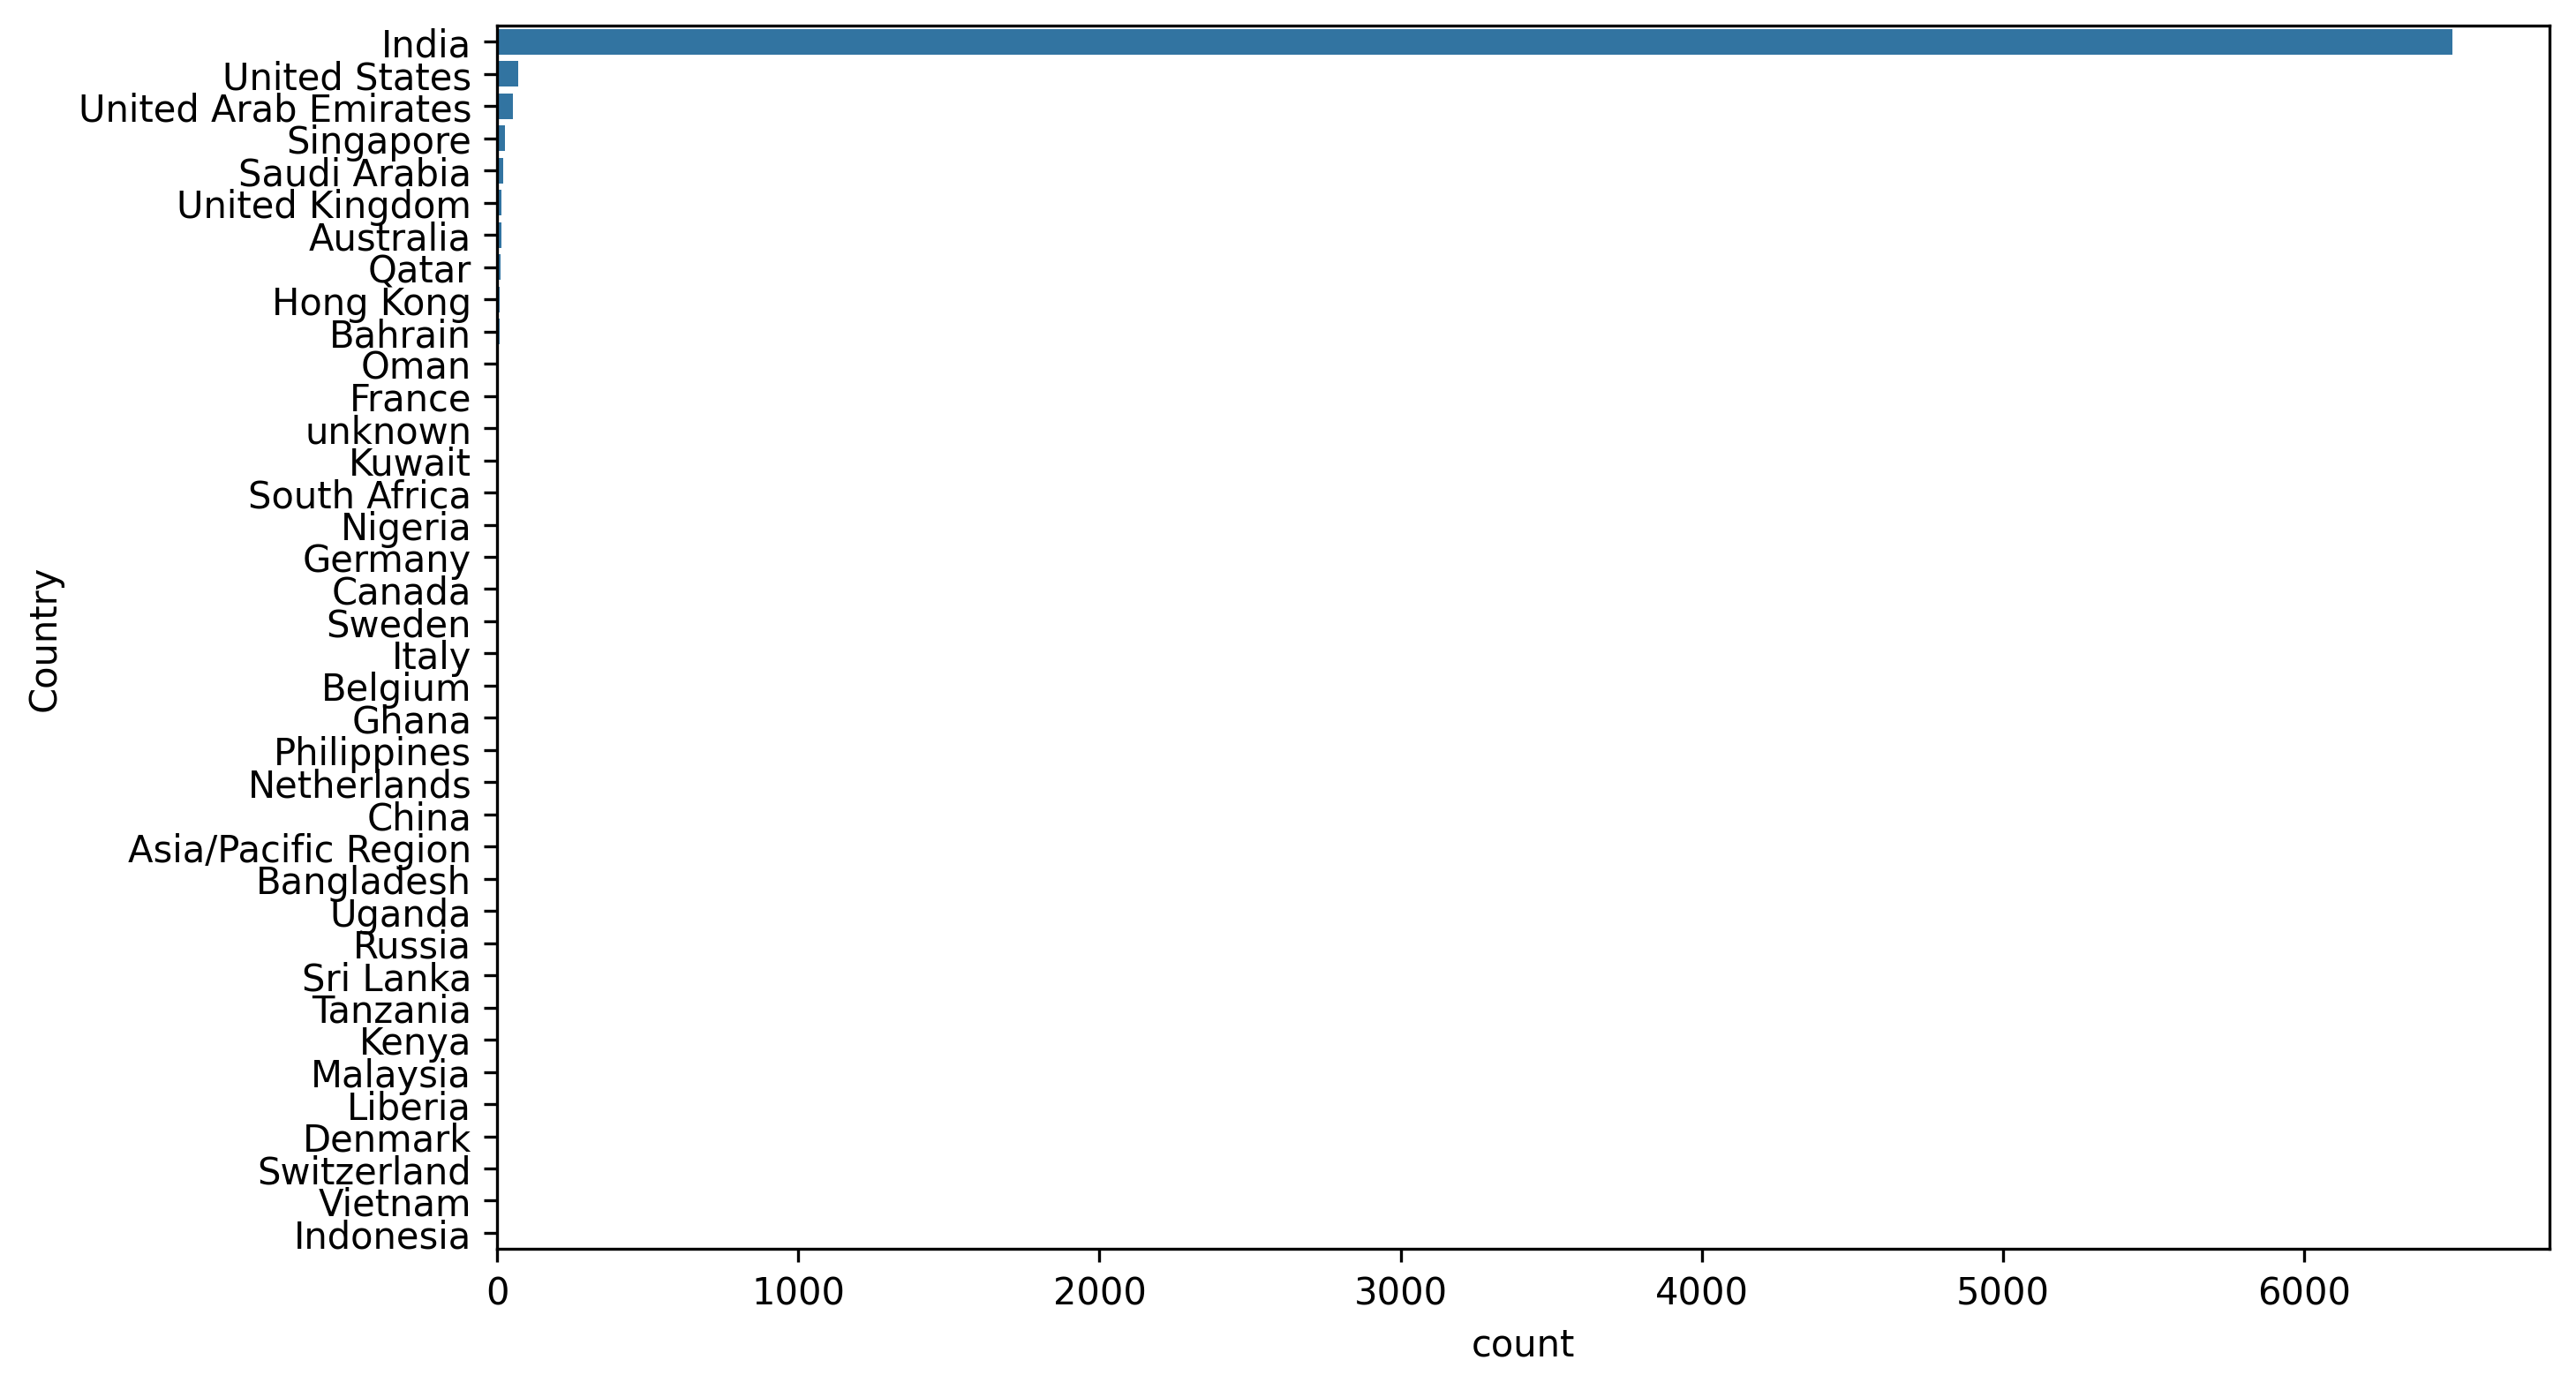

In [ ]:
# Graficamos las Distribucion de "Country"
plt.figure(figsize= (10,6),dpi=300)
sns.countplot(y="Country",data = df,order=df["Country"].value_counts().index)

**Aqui podemos interpretar que el pais  que domina es la India, a pesar de que su dominancia no es mayor del 80%, es muy probable que los Datos faltantes pertenezcan a ese país**

<Axes: xlabel='count', ylabel='City'>

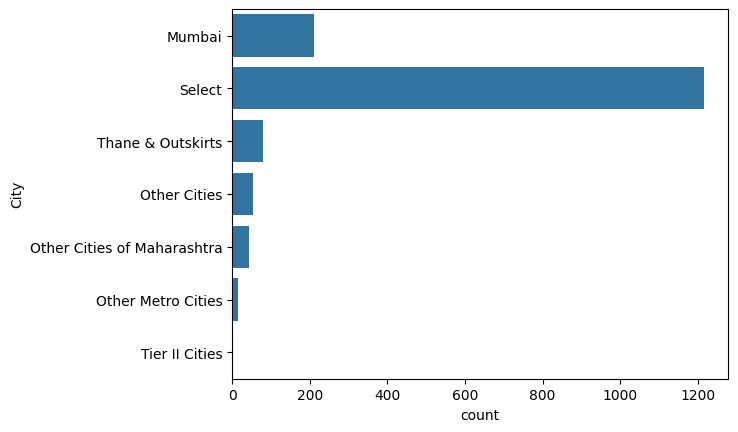

In [ ]:
# Graficamos la distribucion de "City" cuando "Country" sea un dato faltante
sns.countplot(y="City",data = df[df["Country"].isna()],order=df["City"].value_counts().index)

In [ ]:
# Rellenemos los valores Nulos de "Country", con las ciudades de la Variable "City"
ciudades_india = ["Mumbai","Other Cities of Maharashtra","Thane & Outskirts"]

# Aplicamos un bucle para recorrer y rellenar cada Valor faltante en la Variable "Country"
for i in df[df["Country"].isnull()].index:
    if df.loc[i, "City"] in ciudades_india:
        df.loc[i, "Country"] = "India"
    else:
        df.loc[i, "Country"] = "Desconocido"


**Despues de aplicar este codigo, las variable "Country" se rellenó de manera correcta**

## **Imputacion de datos Nulos en Variables Categóricas**
Para rellenar los Valores Nulos en las Variables Categoricas Utilizaremos en el enfoque mencionado anteriormente, **antes de proceder con la imputacion es importante conocer los tipos de Variables Categoricas que tenemos**.


###Clasificación de Variables Categóricas

Antes de procesarlas, clasificamos las variables categóricas en dos tipos:

- **Binarias**: Solo tienen dos posibles respuestas, por ejemplo: Yes o No.

- **Multiclase**: Tienen más de dos categorías y no siguen un orden especifico, por ejemplo: País, Ocupación, Fuente de Tráfico.

###Imputación de Valores Faltantes
Una vez clasificadas, podemos proceder con imputar los valores faltantes (nulos), **estas estrategias que estamos utilizando son basadas en la lógica del negocio**.

Por ejemplo:

En la variable "Country", **los datos faltantes se completaron inteligentemente usando la ciudad del usuario**, lo que garantiza coherencia en los datos.


###**Este tipo de procesamiento de variables categóricas es esencial para convertir datos en decisiones inteligentes, adaptadas a la realidad del negocio**.



In [ ]:
# Convertimos todos los valores que sean "Select" en valores Nulos, para evitar que sea tratado como otra "Categoria"
df.replace("Select", pd.NA, inplace=True)

In [ ]:
# Seleccionamos las Variables Categoricas, con excepcion de la Variable "Country" que ya fue procesada
cat_cols = [col for col in df.columns if df[col].dtype == "object" and col not in ["Country"]]


# Separaracion de las Variables Binarias de las Variables Multiclase
bin_cols = [col for col in cat_cols if df[col].nunique() == 2]  # Variables binarias, contienen 2 categorias.
multi_cat_cols = [col for col in cat_cols if col not in bin_cols]  # Variables con más de 2 categorías.

**Creamos una funcion que nos permitirá rellenar los Valores Nulos de cada Variables Categorica dependiendo sus requisitos, esto de una manera "automatica" y optimizada.**

In [ ]:
# Función para determinar el valor con el que se rellenará cada Variable
def rellenar_valores(col):
    mode_value = df[col].mode()[0]  # Obtener la moda, valor que más se repite
    mode_percentage = (df[col].value_counts(normalize=True).max())  # obtenemos porcentaje de aparición de la moda

    if mode_percentage > 0.80:  # Si la moda representa más del 80%, utilizará la moda para rellenar
        return mode_value

    else:                       # Si no, se rellenará con "Desconocido"
        return "Desconocido"

In [ ]:
# Rellenar valores nulos en las Variables Multiclase
for col in multi_cat_cols:                                  # Aplicamos un Bucle que recorra cada una de las Variables
    if df[col].isnull().sum() > 0:                          # Solo modifica si hay valores nulos, si no, ignora la Variable
        df[col].fillna(rellenar_valores(col), inplace=True) # Aplicamos la Funcion cada Variable para rellenarlas

<ipython-input-16-3263a988c7c1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(rellenar_valores(col), inplace=True) # Aplicamos la Funcion cada Variable para rellenarlas
<ipython-input-16-3263a988c7c1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

### **Nota importante:**

**A las Variables Binarias no le aplicamos la funcion para rellenar debido a que no requieren imputación de valores nulos, ya que, por definición, si un valor no es "Yes", automáticamente es "No"**.



In [ ]:
#########################################################################################################################################################

###**Evitamos la Duplicacion de Variables por mala Escritura**

In [ ]:
# Convertimos la primera letra de cada Valor en cada Variable a Mayuscula
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.title()  # Convierte la primera letra en mayúscula y el resto en minúscula
    df[col] = df[col].str.strip()  # Elimina espacios en blanco al inicio y al final de cada valor


## **Conversión de Variables Categóricas**
Una vez imputados los valores nulos en las variables categóricas, procedemos a optimizar su representación en el modelo, **esto es clave para mejorar la eficiencia y precisión del algoritmo de Regresión Logística**.

### Conversión de Variables Binarias
Las variables categóricas que **contienen respuestas binarias como "Yes" y "No"** se convierten a 0 y 1, esto permite que el modelo interprete estas variables correctamente.

### Conversion de Variables Multiclase
Las variables categóricas, que **contienen valores que no siguen un orden especifico en sus registros**, se transforman al tipo "category" y luego a valores numericos usando una tecnica especial, optimizando el uso de memoria y mejorando la eficiencia del procesamiento.



### **Con esta transformación, nos aseguramos de que el modelo pueda interpretar correctamente las variables categoricas, debido a que los algoritmos de Machine Learning interpretan de mejor manera los Valores Numericos que los valores textuales**.



### **Convertimos las Variables Binarias a Valores Numericos 0 y 1**

In [ ]:
# Con esto todas las Variables Binarias están transformdas de manera correcta
df[bin_cols] = df[bin_cols].replace({'Yes': 1, 'No': 0}).astype(bool)

<ipython-input-19-6619f4c3bf38>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[bin_cols] = df[bin_cols].replace({'Yes': 1, 'No': 0}).astype(bool)


## **Conversión de Variables Categóricas Multiclase**

### **Motivo de esta conversión:**

- **Optimización de memoria:** Al utilizar el tipo "category", el almacenamiento de datos se vuelve más eficiente, ya que en lugar de tratar cada valor como una cadena de texto, se asignan códigos internos a cada categoría.

- **Mejora del rendimiento:** Al reducir el tamaño de los datos, los cálculos del modelo se vuelven más rápidos y eficientes.

#### **Con esta conversión, garantizamos que el modelo pueda manejar de manera óptima las variables categóricas sin perder información ni aumentar innecesariamente la complejidad computacional**.



In [ ]:
# Conversión de las Variables Categoricas Multiclase de tipo "object" a tipo"category"
df[multi_cat_cols] = df[multi_cat_cols].astype('category')

# Cambiamos el tipo de dato de la Variable "Country" a tipo "category"
df["Country"] = df["Country"].astype('category')

# Cambiamos la Variable "Country" por aparte porque recordemos que no estaba incluida en la lista de las Variables Multiclase
# que creamos anteriormente

**Observamos y verificamos que todas las Variables hayan cambiado de dato de manera correcta, tanto las Binarias como las Multiclase o Nominales**

In [ ]:
# Verificamos los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9240 non-null   category
 1   Lead Source                                    9240 non-null   category
 2   Do Not Email                                   9240 non-null   bool    
 3   Do Not Call                                    9240 non-null   bool    
 4   Converted                                      9240 non-null   int64   
 5   TotalVisits                                    9240 non-null   float64 
 6   Total Time Spent on Website                    9240 non-null   int64   
 7   Page Views Per Visit                           9240 non-null   float64 
 8   Last Activity                                  9240 non-null   category
 9   Country                                

###**Verificamos que no existan Variables con Valores Nulos dentro del dataframe**

In [ ]:
# Creamos una lista con las Variables que contengan valores Nulos
columnas_con_nulos = df.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

# Recorremos la lista de Variables
if not columnas_con_nulos.empty:            # Con esta parte indicamos que si hay columnas con Valores Nulos los muestre
    print("🔸 Columnas con valores nulos:")
    print(columnas_con_nulos)
else:                                       # Y si no, con esta parte muestra que ninguna Variable contiene Valores Nulos
    print("✅ No hay valores nulos en el DataFrame.")


✅ No hay valores nulos en el DataFrame.


**Como vemos ninguna Variable contiene Valores Nulos, con lo que aseguramos que el procesamiento fue hecho de manera correcta✅**

## **Verificación y Evaluación del Procesamiento de las Variables**
Tras completar el proceso de imputación y transformación de las variables categóricas, hemos validado que los datos han sido correctamente procesados y optimizados.

## Resultados obtenidos:

**✅ Todas las variables categóricas y numericas fueron rellenadas de manera eficiente sin introducir sesgos.**

**✅ Se implementaron estrategias avanzadas de preprocesamiento para garantizar la coherencia de los datos.**

**✅ Se optimizó el tipo de dato de cada variable, mejorando el rendimiento y reduciendo el consumo de memoria.**

## Importancia de este proceso:
El tratamiento de variables es una de las tareas más desafiantes en Machine Learning, ya que una mala imputación puede afectar significativamente el desempeño del modelo, para evitar esto, aplicamos un enfoque estructurado y automatizado, minimizando errores y garantizando un dataset limpio.

##🚀 Eficiencia y Optimización con Código Avanzado
**Para maximizar la eficiencia, se utilizaron técnicas avanzadas de programación que permitieron automatizar gran parte del proceso, reduciendo la carga de trabajo manual y aumentando la precisión del preprocesamiento, gracias a esta implementación, logramos un preprocesamiento rápido y escalable, evitando la necesidad de manejar cada variable individualmente.**

###**Con este enfoque altamente optimizado, ahora estamos listos para avanzar con confianza hacia la fase de modelado con Regresión Logística.**



In [ ]:
#########################################################################################################################################################

## **Eliminación de Variables Innecesarias**
En este paso, eliminamos algunas variables que no aportan valor real al modelo de predicción y puedes distorcionar el resultado de las predicciones.

### **Eliminacion de Variables Endógenas:**

Como las variables **"Tags"** y **"Lead Quality"**, tienen una relación directa con nuestra variable objetivo **"Converted"**.

Estas variables pueden introducir sesgo en el modelo, ya que contienen información similar a la de la variable que queremos predecir, lo que podría generar sobreajuste.

### **¿Por qué lo hacemos?**
Si una variable ya refleja el resultado que buscamos, usarla en el modelo sería como hacer trampa, además, nos aseguramos de que el modelo aprenda patrones reales en los datos en lugar de depender de información redundante.

#### **Con este paso, garantizamos que nuestro modelo trabaje con información relevante y verdaderamente predictiva, sin depender de variables que podrían distorsionar sus resultados.**


In [ ]:
# Eliminamos las variables Endogenas
df.drop(columns=["Tags", "Lead Quality"], errors="ignore", inplace=True)

## **Eliminación de Variables Redundantes**
Además de quitar variables Endogenas, también es importante eliminar aquellas que contienen información repetida o redundante dentro del conjunto de datos.

### En este caso, analizamos las siguientes variables relacionadas con la actividad y el perfil asimétrico:

 - **Asymmetrique Activity Index**

 - **Asymmetrique Profile Index**

 - **Asymmetrique Activity Score**

 - **Asymmetrique Profile Score**


Para identificar si alguna de ellas es redundante, agrupamos los datos según el Índice de Actividad Asimétrico y utilizamos una técnica especial en Pandas llamada "agg".

**Este método nos permite calcular promedios y comparar los valores para determinar si hay información duplicada**.

### ¿Por qué es importante?
Si dos variables nos dicen lo mismo, mantener ambas solo hace que el modelo sea más complejo sin aportar valor adicional, **al eliminar la redundancia, hacemos que el modelo sea más eficiente y evite confusiones en sus predicciones**.

In [ ]:
#Calculamos la media de cada Indice Asimetrico, agrupados por "Activity Index"
agrupados_por_activity_index = df.groupby("Asymmetrique Activity Index").agg({"Asymmetrique Activity Score":"mean"})

# Mostramos la media de cada Indice Asimetrico
agrupados_por_activity_index

<ipython-input-25-6315ac0aa3ad>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupados_por_activity_index = df.groupby("Asymmetrique Activity Index").agg({"Asymmetrique Activity Score":"mean"})


,Asymmetrique Activity Score
Asymmetrique Activity Index,
01.High,16.437272
02.Medium,14.134931
03.Low,11.290055
Desconocido,14.306252


In [ ]:
# Calculamos la media de cada Perfil Asimetrico, agrupados por "Profile Index"
agrupados_por_profile_index = df.groupby("Asymmetrique Profile Index").agg({"Asymmetrique Profile Score":"mean"})

# Mostramos la media de cada Perfil Asimetrico
agrupados_por_profile_index

<ipython-input-26-aabf07b9e7ed>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupados_por_profile_index = df.groupby("Asymmetrique Profile Index").agg({"Asymmetrique Profile Score":"mean"})


,Asymmetrique Profile Score
Asymmetrique Profile Index,
01.High,18.128007
02.Medium,14.987446
03.Low,11.709677
Desconocido,16.344883


## **Interpretación del Análisis de Redundancia**
Gracias a las técnicas aplicadas, logramos identificar que existe una redundancia entre las variables analizadas.

Específicamente, **pudimos confirmar que los índices son simplemente una versión categórica de los scores**.

### Diferencia clave:

- Los scores son variables numéricas.

- Los índices son variables categóricas derivadas de esos scores.

### **Dado que los índices no aportan información nueva y solo duplican lo que ya está representado en los scores, hemos decidido eliminarlos, esto permite que el modelo se mantenga más limpio y eficiente, evitando incluir datos innecesarios que podrían afectar su rendimiento.**

In [ ]:
# Eliminamos los Indices Asimetricos
df.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index'], axis=1, inplace=True)

In [ ]:
# Verificamos que se eliminaron
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9240 non-null   category
 1   Lead Source                                    9240 non-null   category
 2   Do Not Email                                   9240 non-null   bool    
 3   Do Not Call                                    9240 non-null   bool    
 4   Converted                                      9240 non-null   int64   
 5   TotalVisits                                    9240 non-null   float64 
 6   Total Time Spent on Website                    9240 non-null   int64   
 7   Page Views Per Visit                           9240 non-null   float64 
 8   Last Activity                                  9240 non-null   category
 9   Country                                

#**Segunda parte: Analisis Explorotario de las Variables**

#### Este paso es sumamente importante, debido a que nos permite realizar Analisis de cada Variable y ver la influencia que tienen a la hora de que un Lead se convierta en un cliente legitimo, llevandonos a tomar mejores decisiones basadas en los datos.

##**Análisis de Variables Categóricas Multiclase**

Desarrollamos una función que genera gráficos de barras para visualizar la conversión de leads según categorías, lo que nos permite identificar patrones y relaciones con la variable objetivo "Converted".

###¿Por qué es importante?

**Detecta tendencias dentro de cada categoría.**

**Identifica factores que afectan la conversión de leads.**

**Ayuda a la toma de decisiones.**

###Beneficios:

**1- Compara cada variable categórica Multiclase con la Variable Objetivo, permitiendo identificar cuáles son las más influyentes en la conversion.**

**2-Facilita la toma de decisiones estratégicas al enfocar los esfuerzos en las variables que tienen mayor impacto en la conversión de leads.**

**3-Optimiza las estrategias de marketing y ventas, ajustando las acciones según la influencia específica de cada variable sobre el proceso de conversión.**

###Este análisis es fundamental para entender cómo las variables afectan la conversión y tomar decisiones más efectivas basadas en datos.


In [ ]:
# Creamos la funcion para generar los graficos de barras de las Variables Multiclase
def conteo_de_convertidos(independiente, dependiente='Converted'):
    if independiente not in df.columns or dependiente not in df.columns:
        print(f"❌ Las columnas {independiente} o {dependiente} no existen en el DataFrame.")
        return

    orden = df[independiente].value_counts().index  # Ordenar categorías dentro de la Variable de más a menos frecuentes
    # Construimos la estructura del grafico
    plt.figure(figsize=(12,6), dpi=300)
    ax = sns.countplot(data=df, y=independiente, hue=dependiente, palette="viridis", order=orden)
    plt.title(f"Distribución de la variable '{independiente}' por '{dependiente}'")
    plt.xlabel("Cantidad")
    plt.ylabel(independiente)
    plt.xticks(rotation=45)

    # Añadir etiquetas de conteo sobre las barras
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.5, p.get_y() + p.get_height()/2, int(width), va='center', fontsize=8)

    plt.tight_layout()

    # Mostrar el grafico
    plt.show()


## **Tasa de Conversión General:**

Calculamos el promedio de "Converted" para obtener el porcentaje de leads que se convierten en clientes.

Esto nos permite identificar qué categorías están por encima o por debajo del promedio y ajustar nuestras estrategias.

In [ ]:
# Calcular la tasa de conversión general
tasa_conversion = round(df['Converted'].mean(), 2)
print(f"Tasa de conversión general: {tasa_conversion * 100}%")

Tasa de conversión general: 39.0%


**Este resultado nos ayuda a entender que porcentaje de Leads se convierten en clientes antes de utilizar el modelo de prediccion, luego la utilizaremos para compararla con la tasa de conversion ajustada al Modelo, de esta manera podemos ver como el Modelo ayuda a mejorar ese resultado y por lo tanto la tasa de Leads que se convierten en clientes**.

### Vemos un ejemplo de como utilizar la funcion para graficar una Variable, en este caso será "Lead Source".

**Asi como graficamos esta variable podemos graficar cualquer otra Variable multiclase del dataframe y obtener informacion muy valiosa**.

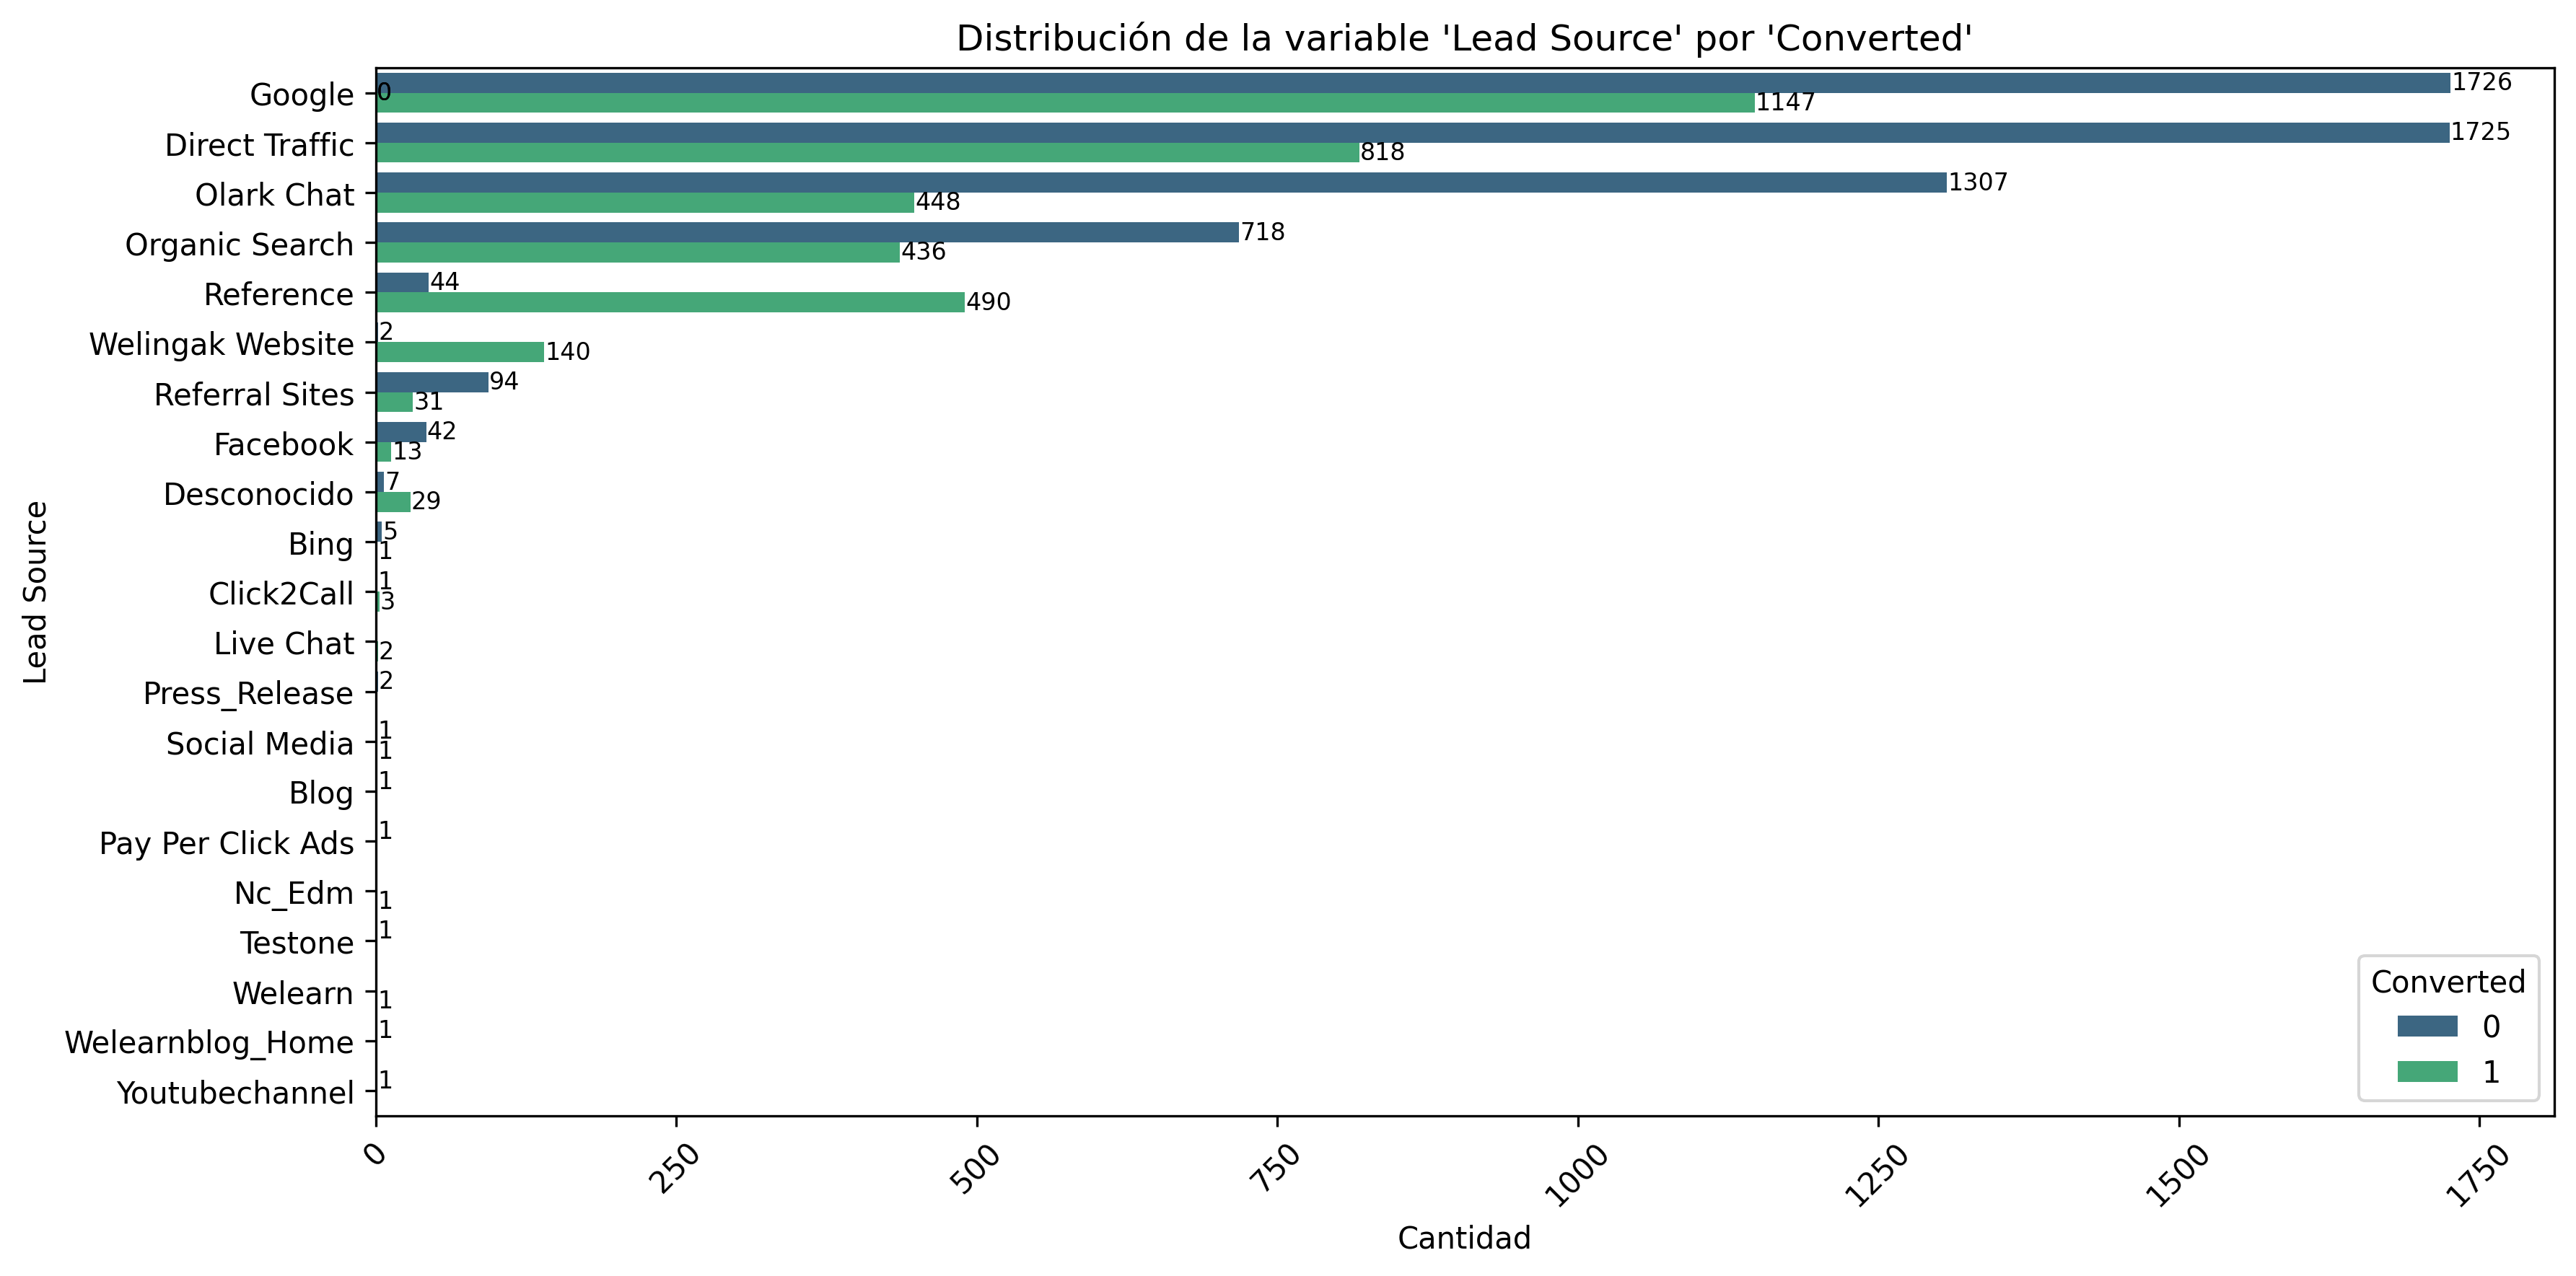

In [ ]:
# Aplicamos la funcion a la Variable categorica multiclase especifica que queremos graficar
conteo_de_convertidos("Lead Source")  # Solo cambiamos el nombre por el de la Variable especifica que queremos analizar

##**🎯 Interpretación del Gráfico: "Lead Source" vs "Converted"**
Este gráfico nos muestra la fuente de la que vienen los leads y cuántos de ellos terminan convirtiéndose en clientes reales y cuántos no.

####🔍 ¿Qué observamos?
**Google, Direct Traffic y Olark Chat** son las tres fuentes más utilizadas por los leads.

Estas fuentes no solo generan una gran cantidad de leads, sino que también aportan una buena cantidad de conversiones, lo cual indica que **son canales eficaces para atraer clientes potenciales de calidad.**

Otras fuentes como **Organic Search y Reference** también muestran una conversión destacable, aunque en menor escala.

Por otro lado, plataformas como **Facebook, Bing, Click2Call, Press Release y Blog** casi no generan conversiones, de hecho, **en muchos de estos casos, los leads no se convierten en clientes**, o lo hacen en cantidades mínimas.

###**✅ ¿Qué decisiones se pueden tomar?**
**1- Invertir más en lo que funciona:**

Dado que **Google, el tráfico directo y Olark Chat generan tanto leads como conversiones**, se pueden considerar estrategias para reforzar estas fuentes:
- Aumentar presupuesto en campañas.
- Mejorar el posicionamiento en Google o fortalecer el canal de chat.

**2- Revisar o descartar lo poco efectivo:**

Fuentes como **Bing, Social Media, Press Release y otras más pequeñas podrían estar generando leads que no califican** o que no están interesados en los productos, en este caso, se podrían:

- Reducir o reasignar presupuesto de marketing en esas fuentes.

- Revisar el mensaje o contenido que se muestra en esas plataformas para entender por qué no convierten.

**3- Segmentar y personalizar:**

**Cada fuente puede atraer un tipo distinto de persona**, si se analiza más a fondo, podríamos:

- Personalizar el contenido o las ofertas según la fuente, aumentando así las probabilidades de conversión.

###📌 Conclusión
**Este tipo de análisis es fundamental para que los equipos de marketing y ventas tomen decisiones informadas sobre dónde invertir tiempo y recursos.**

**Saber qué canales realmente traen clientes y no solo visitas es clave para mejorar los resultados del negocio y optimizar el presupuesto.**


In [ ]:
##########################################################################################################################################################

## **Análisis de Variables Booleanas o Binarias para la Conversión de Leads**

En este análisis, **creamos una Matriz de Confusión y la visualizamos con un mapa de calor**, esto nos ayuda a entender cómo las variables Binarias afectan la conversión de Leads en clientes.

### ¿Qué nos ayuda a descubrir este análisis?

**1- Patrones clave:** Nos muestra cómo las variables Binarias influyen en si un prospecto se convierte o no en cliente.

**2- Estrategias más efectivas:** Nos da información clara para crear estrategias que mejoren la conversión, ajustando nuestras acciones según los datos.

####**Este análisis es fundamental para comprender mejor las relaciones en los datos y tomar decisiones más inteligentes y dirigidas, en base a las Variables Binarias.**

In [ ]:
# Importamos la Biblioteca que necesitaremos
from sklearn.metrics import confusion_matrix  # "confusion_matrix" nos permite obtener la matriz de confusion

# Funcion para Analizar las Variables Booleanas
def matriz_de_confusion(variable_independiente, variable_dependiente='Converted', guardar_imagen=False):

    # Hacemos el uso del manejo de excepciones para evitar que el codigo se pare
    if df is None:
        raise ValueError("Debes proporcionar un DataFrame válido.")

    if variable_independiente not in df.columns or variable_dependiente not in df.columns:
        raise ValueError(f"Las variables '{variable_independiente}' y/o '{variable_dependiente}' no están en el DataFrame.")

    # Verificar que las columnas sean booleanas (0/1 o True/False)
    if not all(df[variable_independiente].isin([0, 1])) or not all(df[variable_dependiente].isin([0, 1])):
        raise ValueError("Las variables deben ser binarias (0/1 o True/False).")

    # Crear la matriz de confusión
    matriz = confusion_matrix(df[variable_dependiente], df[variable_independiente])
    # Convertir la matriz en un DataFrame para mejor visualización
    matriz_df = pd.DataFrame(matriz,
                             index=[f"No {variable_dependiente}", f"Sí {variable_dependiente}"],
                             columns=[f"No {variable_independiente}", f"Sí {variable_independiente}"])

    # Mostrar la matriz de confusión como tabla
    print("\nMatriz de Confusión:")
    print(matriz_df)

    # Configuración del gráfico
    plt.figure(figsize=(10, 5), dpi=300)
    ax = sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
    plt.xlabel(variable_independiente)
    plt.ylabel(variable_dependiente)
    plt.title(f'Matriz de Confusión: {variable_independiente} vs {variable_dependiente}')

    # Si se necesita guardar la imagen(Opcional)
    if guardar_imagen:
        plt.savefig(f"matriz_de_confusion_{variable_independiente}_vs_{variable_dependiente}.png", dpi=300)

    # Mostramos el grafico
    plt.show()



#### Analisis de ejemplo utilizando la Variable Binaria "Do Not Email"

**De igual manera como la anterior funcion, la podemos aplicar a cualquier Variable Binaria que deseemos analizar**


Matriz de Confusión:
              No Do Not Email  Sí Do Not Email
No Converted             5063              616
Sí Converted             3443              118


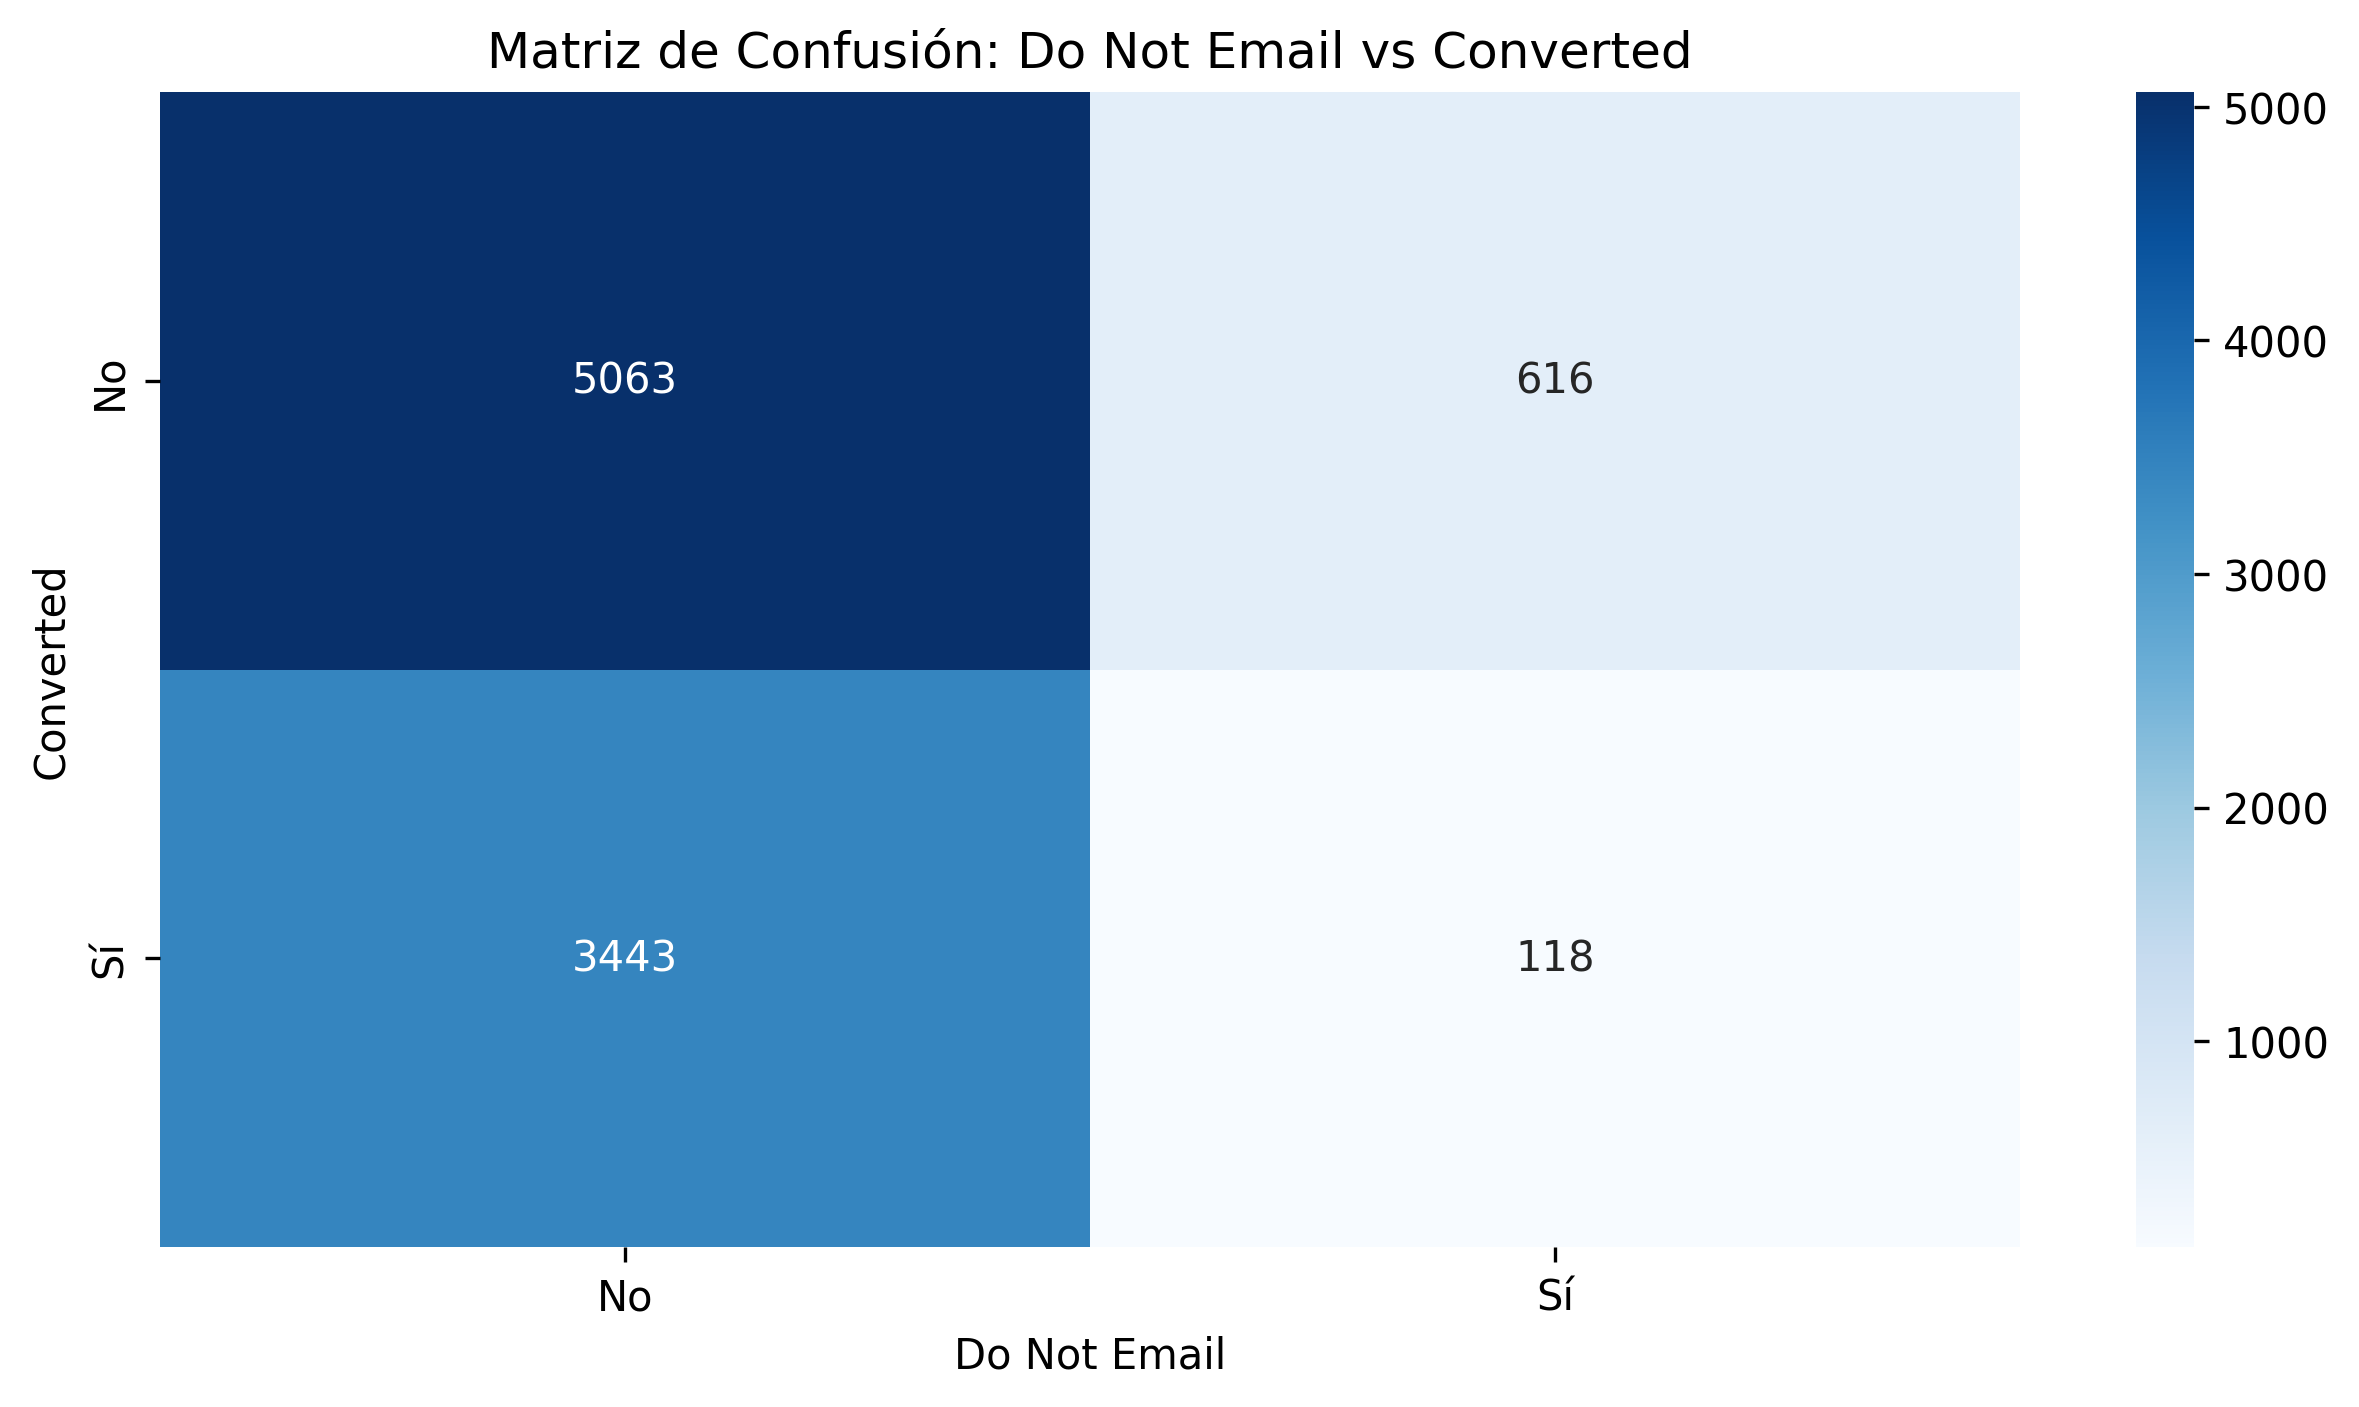

In [ ]:
# Visualizamos la matriz de la variable "Do Not Email"
matriz_de_confusion("Do Not Email", "Converted") #Cambiamos "Do Not Email" por el nombre de la Variable especifica que queremos analizar

## **Interpretación de la Variable "Do Not Email"**

 **- 5,063 leads no marcaron "Do Not Email" y no se convirtieron**.

 **- 3,443 leads no marcaron "Do Not Email" y sí se convirtieron**.

 **- 616 leads marcaron "Do Not Email" y no se convirtieron**.

 **- 118 leads marcaron "Do Not Email" y sí se convirtieron**.

### Conclusiones:
La gran mayoría de los leads que se convirtieron (3,443 de 3,561) **no marcaron "Do Not Email"**.

**Solo 118 de 734 leads que marcaron "Do Not Email" se convirtieron**, lo que es una cifra baja.

Existe una correlación negativa entre la opción de "No recibir correos" y la conversión, **los leads que optaron por no recibir correos electrónicos tienen una tasa de conversión más baja**.

### Estrategia de marketing:
**Esto sugiere que el correo electrónico puede ser un canal importante para la conversión, por lo que sería útil explorar estrategias para aumentae el número de leads que eligen recibir correos.**

In [ ]:
##########################################################################################################################################################

## 📊 Análisis de Variables Numericas con Gráficos de Caja y Bigotes
Para entender mejor cómo se comportan ciertos datos y cómo influyen en la conversión de leads en clientes, utilizamos un tipo de gráfico especial llamado **"gráfico de caja** y **bigotes"**.

###¿Qué nos muestra este gráfico?
Nos ayuda a ver cómo se distribuyen los datos: **cuáles son los valores más comunes**, **si hay datos muy distintos al resto**, y **cómo varía la información**.

Es especialmente útil para identificar comportamientos inusuales o extremos, que podrían afectar los resultados del negocio.

#### **¿Por qué es útil?**
Este tipo de análisis nos permite:

- Ver si hay valores inesperados que podrían estar afectando las decisiones.

- Comparar cómo varían las características de los leads que compran frente a los que no compran.

- Tomar decisiones más informadas al entender mejor el comportamiento de las variables numéricas.


###🧠 Nota Importante:
*“Comprender los datos es el primer paso para mejorar las decisiones de negocio; y este tipo de gráficos nos permite ver más allá de los promedios.”*



In [ ]:
# Creamos una funcion que Genera un gráfico de caja y bigote entre una variable Numérica y la variable "Converted".
def grafico_de_caja(variable_independiente, variable_dependiente='Converted', guardar_imagen=False):

    # Verificar que las columnas existen en el DataFrame, manejamos las excepciones para que no se pare el codigo
    if variable_independiente not in df.columns or variable_dependiente not in df.columns:
        raise ValueError(f"Las variables '{variable_independiente}' y/o '{variable_dependiente}' no están en el DataFrame.")

    # Configuración de la estructura del gráfico
    plt.figure(figsize=(10, 5), dpi=300)
    ax = sns.boxplot(x=df[variable_dependiente], y=df[variable_independiente], palette="Blues")

    # Personalización del gráfico
    plt.xlabel(variable_dependiente)
    plt.ylabel(variable_independiente)
    plt.title(f'Gráfico de Caja: {variable_independiente} vs {variable_dependiente}')

    # Si se necesita guardar la imagen(Opcional)
    if guardar_imagen:
        plt.savefig(f"grafico_de_caja_{variable_independiente}_vs_{variable_dependiente}.png", dpi=300)

    # Mostrar el gráfico
    plt.show()



### Visualizamos como ejemplo la Variable **"Page Views Per Visit"** para ver el impacto que tiene en relacion con la Variable Objetivo.

**Igualmente podemos aplicar la funcion a cualquiera de las Varibles numericas del DataFrame para analizarlas detalladamente.**

<ipython-input-36-53965a38db49>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df[variable_dependiente], y=df[variable_independiente], palette="Blues")


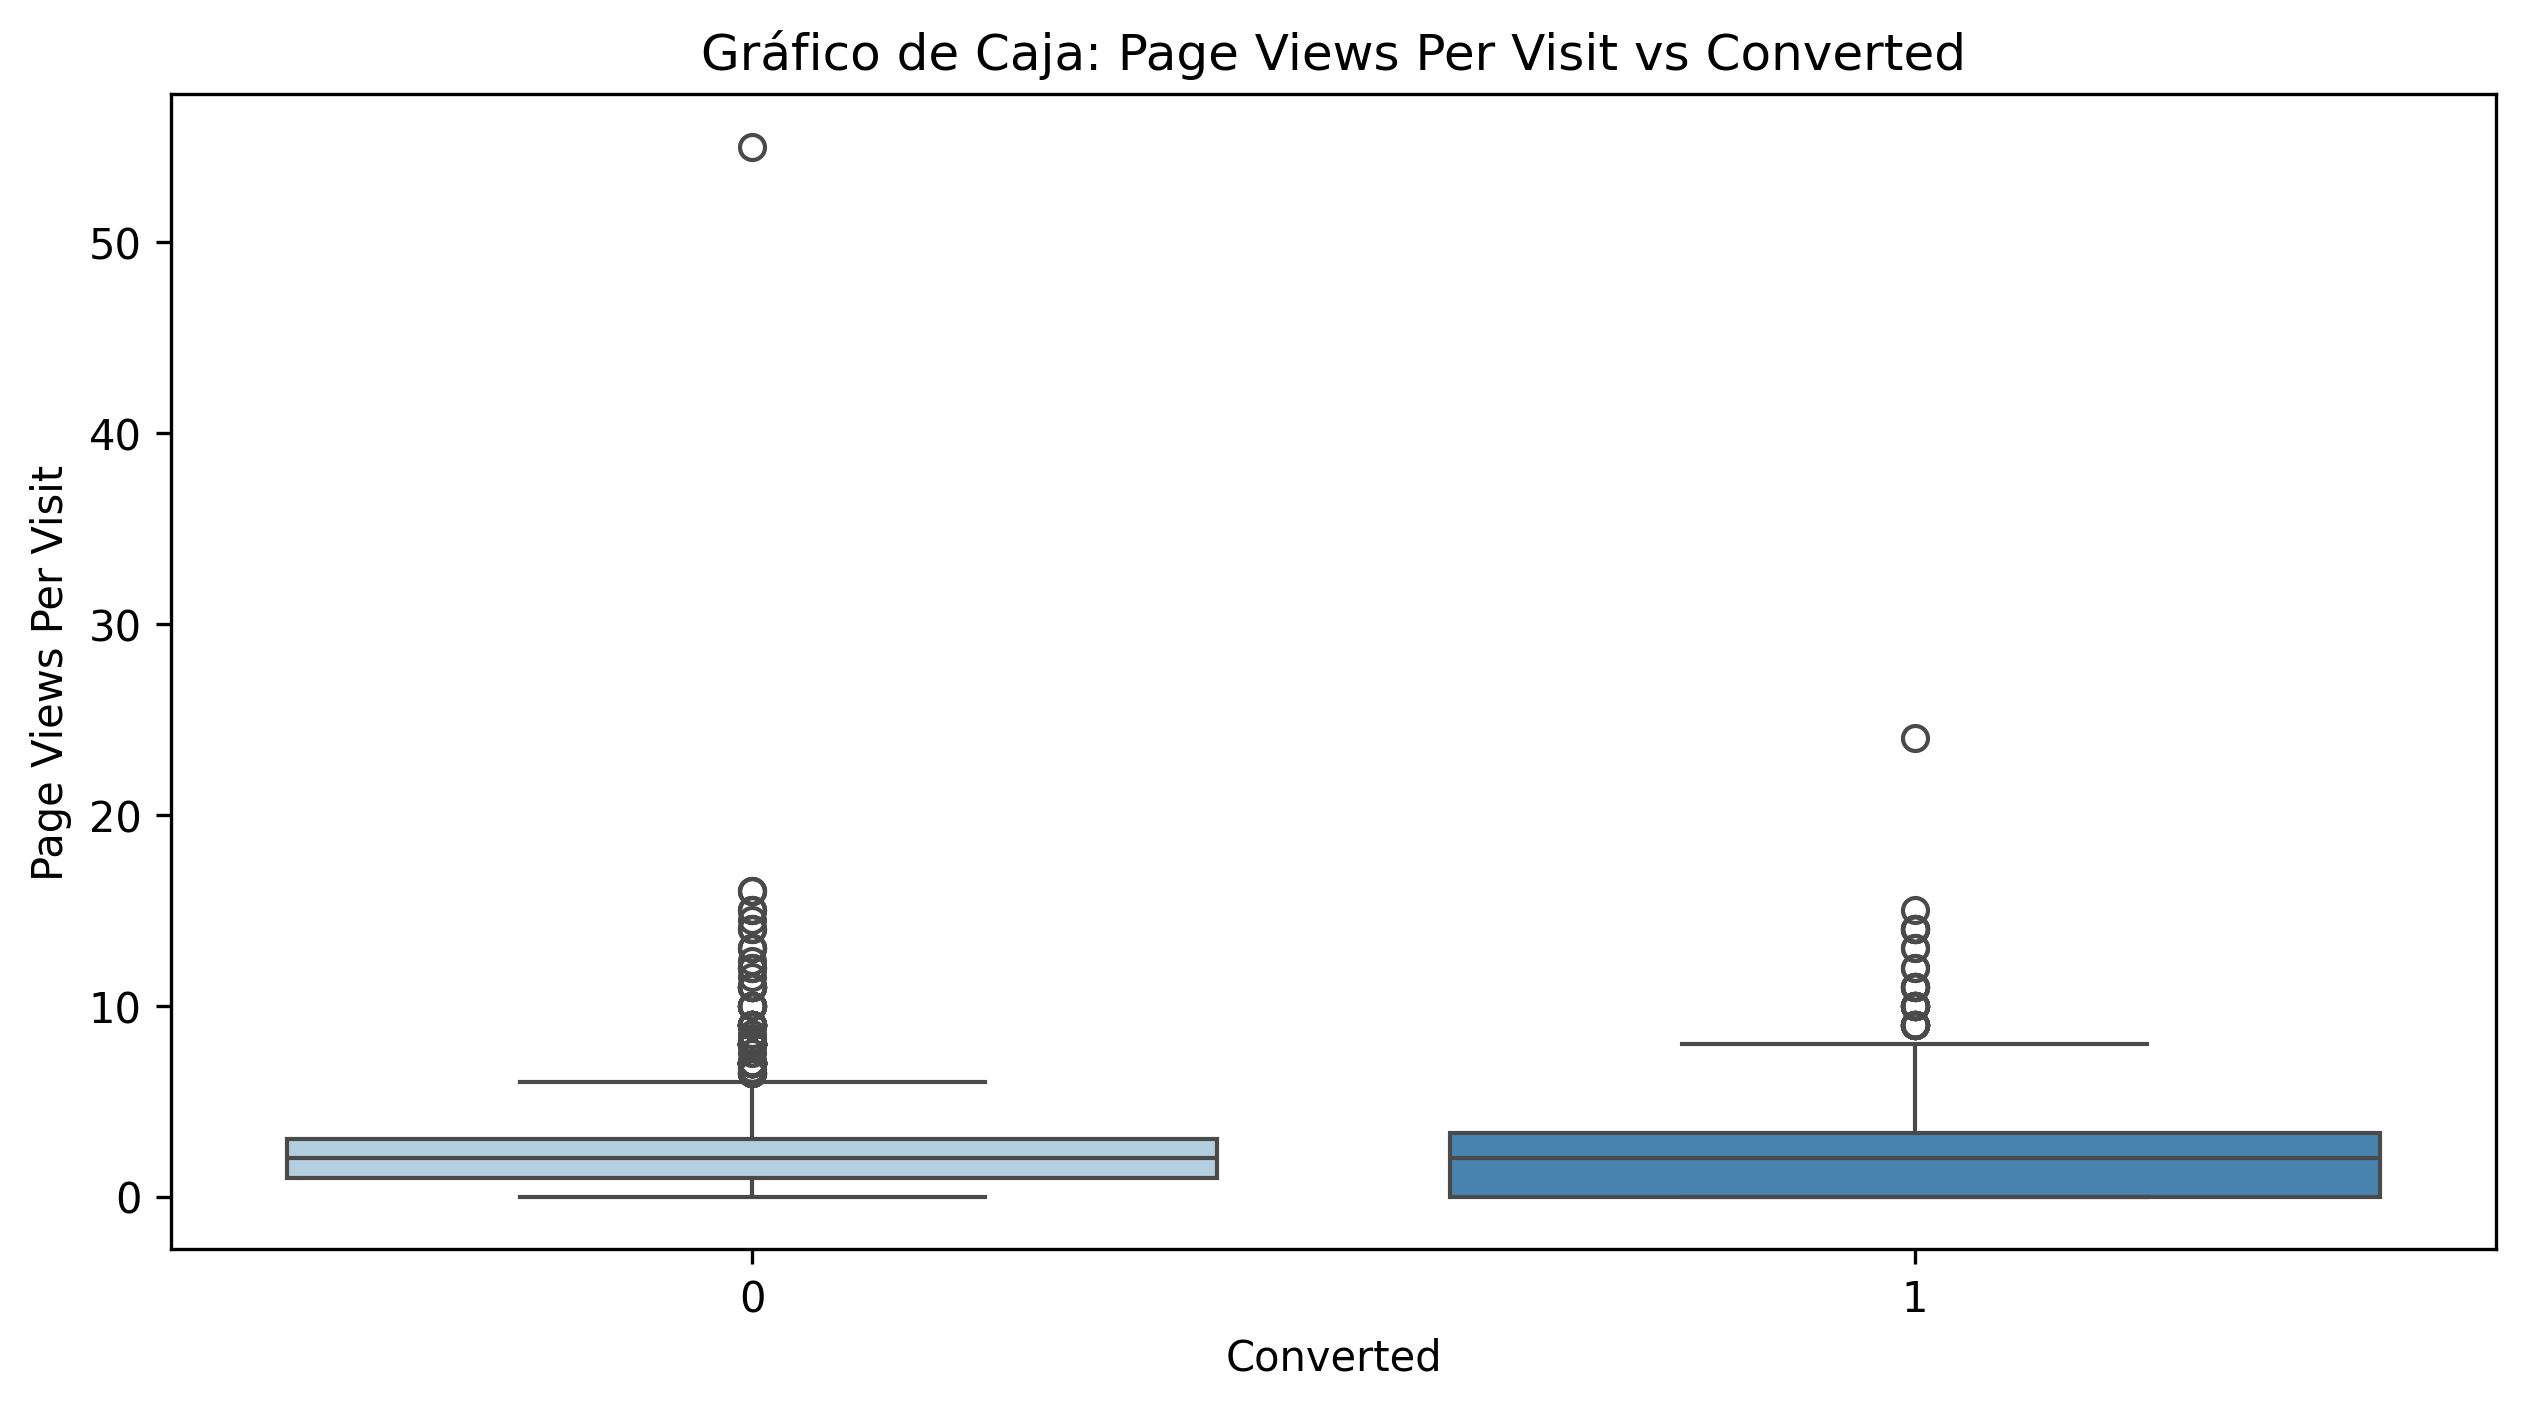

In [ ]:
# Visualizamos la Variable numerica "Page Views Per Visit"
grafico_de_caja("Page Views Per Visit") # Solo cambiamos el nombre de la Variable especifica que queremos analizar

## **Análisis de la Distribución de Páginas Vistas por los Usuarios**

###📈 ¿Influye la cantidad de páginas vistas en la conversión de un lead?

Al analizar la cantidad de páginas vistas por los usuarios antes de convertirse en clientes, encontramos un patrón muy similar en ambos grupos:

- Tanto los usuarios que no compraron como los que sí compraron **tienen una mediana de visitas casi idéntica, alrededor de 2 páginas vistas**.

- **La mayoría de los usuarios, sin importar si compraron o no, ven entre 0 y 5 páginas**.

- Aunque hay casos atípicos donde algunos usuarios vieron más de 50 páginas, estos se presentan en ambos grupos, por lo que **no marcan una diferencia real**.

###**¿Qué podemos concluir?**

Este análisis deja claro que el número de páginas vistas por visita **no es un factor clave en la decisión de compra**, no hay evidencia de que los usuarios que exploran más el sitio tengan mayor intención de convertirse en clientes.

Por lo tanto, **basar decisiones estratégicas en esta métrica podría llevar a conclusiones equivocadas**.

Es mejor enfocar los esfuerzos en otras variables que realmente impacten la conversión.

####**Conexión con el gráfico**:
El gráfico de caja y bigotes nos permitió ver de forma clara la similitud entre ambos grupos y detectar valores atípicos, demostrando que, **aunque algunos usuarios navegan más, esto no se traduce en una mayor probabilidad de compra**.

In [ ]:
##########################################################################################################################################################

## **🔍 Conclusión del Análisis Exploratorio**
Realizar un análisis exploratorio de las variables **es clave para entender el comportamiento de los datos y descubrir patrones valiosos**.

Como vimos en los ejemplos anteriores, **estas técnicas nos permiten identificar qué variables pueden influir en la conversión** y cómo se comportan los usuarios.

Gracias a esta información, **podemos tomar decisiones más acertadas, ya que están fundamentadas en evidencia** y no en suposiciones, en resumen, explorar los datos adecuadamente nos da una base sólida para **diseñar mejores estrategias y aumentar la conversion de Leads valiosos** al mismo tiempo que las ganancias economicas.

In [ ]:
##########################################################################################################################################################

# **Tercera Parte: Preparacion del Modelo de Regresion Logistica**
Despues de rellenar y procesar las Variables, podemos preparar el Modelo pero antes de eso, es fundamental terminar de preparar correctamente los datos, para ello:

- **Convertimos las variables categóricas Multiclase en variables dummy**, que son variables binarias, lo que permite que el modelo pueda procesarlas correctamente.

- **Separarmos la variable objetivo "Converted" de las demás Variables**.

#### De esta forma, definimos:

**X, como el conjunto de variables independientes**, son las Variables que nos ayudaran a predecir el resultado de la Variable Objetivo, son todas menos "Converted.

**Y, como la variable Objetivo**, que es la Variable "Converted".

####**Esta preparación es clave para que el modelo pueda aprender de forma precisa y generar predicciones confiables.**


In [ ]:
# Asignamos las Variables independientes y las convertimos a Dummy
X = pd.get_dummies(df.drop(columns= "Converted",axis=1),drop_first=True)

# Mostramos las variables independientes transformadas a Dummy
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted On Website,Last Notable Activity_Had A Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited On Website,Last Notable Activity_Resubscribed To Emails,Last Notable Activity_Sms Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View In Browser Link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,False,False,0.0,0,0.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
660728,False,False,5.0,674,2.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
660727,False,False,2.0,1532,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
660719,False,False,1.0,305,1.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
660681,False,False,2.0,1428,1.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# Asignamos la Variable Objetivo "Converted"
Y = df["Converted"]

## **🔄 División de los Datos: Entrenamiento y Prueba**

Para construir un modelo confiable, dividimos nuestro conjunto de datos en dos partes:

**1- Conjunto de entrenamiento:** Es el grupo de datos con el que el modelo “aprende”, aquí analiza los patrones y relaciones entre las variables para predecir si un lead se convertirá o no.

**2- Conjunto de prueba:** Es un conjunto de datos nuevos que el modelo nunca ha visto, se utiliza para evaluar qué tan bien "aprendió" el modelo y si puede predecir resultados reales en situaciones desconocidas.

### Esta estrategia es fundamental para:

- Evitar el sobreajuste, que ocurre cuando el modelo se memoriza los datos y no logra predecir correctamente.

- Comprobar que el modelo puede funcionar bien con nuevos datos, similares a los que encontraría en un entorno real.

#### **En resumen, el modelo aprende de un grupo de datos y luego se pone a prueba con otro, asegurando así que sus predicciones sean útiles y aplicables en el mundo real.**

In [ ]:
# Importamos la funcion "train_test_split" que nos permite separar los datos
from sklearn.model_selection import train_test_split

# Dividimos los datos en conjuntos de Entrenamiento y Prueba
X_entrenamiento, X_evaluacion, Y_entrenamiento, Y_evaluacion = train_test_split(X, Y, test_size=0.2,random_state=99,stratify= Y)

## **Escalado de Variables Numericas utilizando MinMaxScaler**

### **¿Qué es el Escalado de Datos?**

Cuando tenemos números muy diferentes entre sí en nuestras variables Numericas, por ejemplo, una columna con valores entre 1 y 1000, y otra entre 0 y 1, algunos algoritmos de Machine Learning pueden confundirse o dar más importancia a los números más grandes.

Por eso, escalamos los datos, para que todas las variables estén en un rango similar y el modelo las trate por igual.

### **¿Por qué usamos MinMaxScaler?**

- Elegimos MinMaxScaler porque **ajusta los valores de las variables numéricas para que estén entre 0 y 1**.

- **Esto funciona muy bien cuando asumimos que los datos no siguen una distribución normal** y cuando hay algunos valores atípicos pero no son demasiado extremos.

In [ ]:
# Importamos la funcion "MinMaxScaler" de Sklearn
from sklearn.preprocessing import MinMaxScaler
# Importamos la instancia de Regresion Logistica
from sklearn.linear_model import LogisticRegression

# Seleccionar las Variables numéricas
variables_scalar = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
                      'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

# Aplicar MinMaxScaler
scaler = MinMaxScaler()

X_entrenamiento[variables_scalar] = scaler.fit_transform(X_entrenamiento[variables_scalar]) # Lo trabajamos con el conjunto de datos de entrenamiento




In [ ]:
# Verificamos la transformacion en el conjunto de Datos de entrenamiento
X_entrenamiento.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted On Website,Last Notable Activity_Had A Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited On Website,Last Notable Activity_Resubscribed To Emails,Last Notable Activity_Sms Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View In Browser Link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
627877,False,False,0.015936,0.672975,0.072727,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
585642,False,False,0.015936,0.079225,0.036364,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
617566,False,False,0.023904,0.453345,0.054545,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
655639,False,False,0.015936,0.001320,0.072727,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
593227,False,False,0.003984,0.210387,0.018182,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


**Ahora transformamos la base de de datos de evaluacion "X_evaluacion", le aplicamos la misma escala que al conjunto de entrenamiento**.

In [ ]:
# En esta parte no usamos "fit_transform", si no que usamos solamente "transform"
X_evaluacion[variables_scalar] = scaler.transform(X_evaluacion[variables_scalar])

# Verificamos los resultados
X_evaluacion.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted On Website,Last Notable Activity_Had A Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited On Website,Last Notable Activity_Resubscribed To Emails,Last Notable Activity_Sms Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View In Browser Link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
591899,False,False,0.015936,0.173856,0.024182,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
604007,False,False,0.019920,0.412852,0.090909,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
653773,False,False,0.011952,0.111356,0.054545,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
611519,False,False,0.015936,0.699384,0.072727,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
584568,False,False,0.007968,0.014525,0.036364,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


## **Creacion del Modelo de Regresion Logistica**


In [ ]:
# Creamos el Modelo
modelo_reg_logistica = LogisticRegression()

In [ ]:
# Entrenamos el modelo con el conjunto de datos de entrenamiento
modelo_reg_logistica.fit(X_entrenamiento, Y_entrenamiento)

LogisticRegression()

In [ ]:
# Obtenemos las predicciones en probabilidades, del conjunto de datos de Evaluacion
Y_prediccion = modelo_reg_logistica.predict_proba(X_evaluacion)[:,1]

# Mostramos las probabilidades
Y_prediccion

array([0.30006455, 0.91792264, 0.11542601, ..., 0.16981418, 0.98108261,
       0.04503486])

**Con este codigo seleccionamos la segunda columna de la salida que representa la probabilidad de que la observacion pertenezca a la clase 1, es decir a "Converted"**.

La funcion "predict_proba" devuelve un array de 2 columnas para una Regresion Logistica binaria, donde la primer columna(0) representa la probabilidad de la clase **No convertidos** y la segunda columna(1) la probabilidad de la clase **Convertidos**, por eso elegimos la segunda columna que es representada con un "1".

# **Cuarta Parte: Evaluacion de Rendimiento del Modelo Predictivo**

##📊 Evaluación del Modelo con Curva ROC y AUC
Estas tecnicas nos ayudan a evaluar el rendimiento del Modelo para diferenciar entre 2 clases: **Compradores** y **No compradores**.

###**✅ Curva ROC**

La Curva ROC nos ayuda a visualizar graficamente el rendimiento del Modelo, en base a 2 metricas:

TPR: Qué tan bien detecta a los leads que sí compran.

FPR: Leads que no compran y fueron mal clasificados como compradores.

**Una curva más cercana a la esquina superior izquierda indica mejor rendimiento, así podemos ver qué tan bien prioriza el modelo a los leads correctos.**

###**📈 AUC: Un solo número para resumirlo todo**
El AUC (Área Bajo la Curva ROC) **indica qué tan bien el modelo diferencia entre compradores y no compradores**:

- AUC igual a 1: Clasificación perfecta.

- AUC mayor 0.8: Muy buen rendimiento.

- AUC igual a 0.5: El modelo no aprende nada útil, significa que está haciendo predicciones al azar.

**Un AUC alto significa que el modelo prioriza bien los leads con más potencial, lo cual es clave para tomar decisiones estratégicas**.

###🎯 ¿Por qué importa?
Estas métricas no solo miden aciertos, sino que tambien nos ayudan a interpretar como el modelo está decidiendo, nos ayudan a:

- **Saber que tan bien aprendió el Modelo**, para luego tomar decisiones basadas en esos datos.

- **Validar si el modelo es confiable**.

- **Maximizar el retorno de inversión** al enfocar esfuerzos en los leads más valiosos.

**Un Modelo con un AUC igual a 1 puede parecer lo ideal, pero realmente no lo es, debido a que es una señal de sobreajuste e indica que no está decidiendo bien, sino solo "memorizando", cuando lo ideal es que el Modelo "aprenda" para que luego pueda hacer predicciones correctas**.

**Un AUC deseado sería entre 0.90 y 1**, que indica que el Modelo logró "aprender" bien sin "memorizar" ningun patron.

In [ ]:
#########################################################################################################################################################


## **¿Qué es un Punto de Corte?**
El punto de corte se comporta como un filtro que nos ayuda a decidir si un lead tiene suficiente potencial para ser considerado como una oportunidad de conversión e inversión, en otras palabras, **determina si un lead tiene una alta probabilidad de convertirse en cliente, ayudándonos a dirigir los recursos de forma más precisa**.

####Los Umbrales determinan cuán exigente es el modelo para clasificar un lead como comprador.

**1- Umbral alto, entre 0.9 y 1**

- Solo los leads con alta probabilidad serán clasificados como compradores.


**2- Umbral medio, 0.5 el valor por defecto**

- No distingue entre compradores y no compradores, sus decisiones son al azar

**3- Umbral bajo,entre 0.1 y 0.3**

- Se captan más compradores reales, pero también deja pasar muchos falsos positivos.

### Ejemplo:

Si un lead tiene una probabilidad de 0.7 y el umbral es 0.8, se clasifica como no comprador.

Si bajamos el umbral a 0.6, ahora se clasifica como comprador.


##✅ ¿Qué son los Verdaderos Positivos y Falsos Positivos?

#### **Verdaderos Positivos (TP)**:
Son los casos en los que el modelo acierta al predecir que un lead sí va a comprar y efectivamente compra.

 **Ejemplo**: El modelo predice que una persona comprará un curso, y en efecto lo hace.

#### **Falsos Positivos (FP)**:
Son los casos en los que el modelo cree que un lead va a comprar, pero en realidad no compra.

👉 **Ejemplo**: El modelo predice que una persona comprará, se invierte tiempo y recursos en ella, pero finalmente no realiza la compra.

####Estos dos conceptos son clave para evaluar qué tan bien está funcionando un modelo, ya que los falsos positivos generan costos innecesarios, mientras que los verdaderos positivos representan oportunidades reales de conversión.



## **Calculamos el AUC y construimos la Curva ROC**

#### Utilizamos la función "roc_curve" para calcular los valores necesarios para trazar la Curva ROC, nos dará 3 resultados:

 **- Tasa de Verdaderos Positivos**.

 **- Tasa de Falsos Positivos**.

 **- Puntos de Corte o Umbrales**.




In [ ]:
# Importamos la funcion "roc_curve"
from sklearn.metrics import roc_curve,auc

In [ ]:
# Obtenemos el fpr, el tpr y los Umbrales
fpr, tpr, puntos_de_corte = roc_curve(Y_evaluacion, Y_prediccion)

**Visualizamos los resultados de los puntos de corte, que es lo que verdaderamente nos importa para mas adelante obtener el mas optimo**.

In [ ]:
# Mostramos los puntos de Corte
puntos_de_corte


array([           inf, 9.99200700e-01, 9.98692050e-01, 9.98644589e-01,
       9.98575404e-01, 9.98482438e-01, 9.92077096e-01, 9.91915463e-01,
       9.90995264e-01, 9.90738238e-01, 9.88623937e-01, 9.88463755e-01,
       9.88453897e-01, 9.88345328e-01, 9.88006954e-01, 9.87760221e-01,
       9.84416491e-01, 9.84344814e-01, 9.66744544e-01, 9.66720643e-01,
       9.55260661e-01, 9.55097546e-01, 9.55028290e-01, 9.54390896e-01,
       9.48834831e-01, 9.47858054e-01, 9.38943125e-01, 9.37987173e-01,
       9.30975838e-01, 9.30263943e-01, 9.28335434e-01, 9.27974400e-01,
       9.24506572e-01, 9.23627374e-01, 9.22501514e-01, 9.22364857e-01,
       9.19067805e-01, 9.18049807e-01, 9.16309412e-01, 9.16109599e-01,
       9.04119806e-01, 9.03777793e-01, 9.03768031e-01, 9.03692819e-01,
       8.96898034e-01, 8.96540290e-01, 8.94725225e-01, 8.94106762e-01,
       8.92442044e-01, 8.91115685e-01, 8.88141514e-01, 8.87599304e-01,
       8.85271899e-01, 8.83766801e-01, 8.83557151e-01, 8.81833779e-01,
      

## Calculamos el AUC (Area Bajo la Curva)
**Se obtiene en base a la tasa de Verdaderos Positivos y la tasa de Falsos Positivos, utilizando lafuncion "auc", nos muestra la eficacia del modelo para distinguir entre ambas clases**.

In [ ]:
# Calculamos el AUC
auc_calculado = auc(fpr,tpr)

In [ ]:
# Mostramos el AUC
auc_calculado

np.float64(0.9167701080075962)

**Obtuvimos un AUC de aproximadamente 0.92, lo cual indica que es un modelo con un excelente rendimiento, debido a que se acerca bastante a 1**.

## Graficamos la Curva ROC
**Visualizamos el rendimiento del modelo mostrando de manera grafica los resultados obtenidos con "roc_curve"**, con el fin de asegurar que el Modelo si diferencia bien entre ambas clases.

Un grafico que muestra la curva ROC muy tirada hacia la izquierda significa que es un buen modelo.

Creamos una funcion que grafique la curva ROC, pasandole como parametros el fpr, el tpr y el el AUC calculado para mostrarlo dentro del grafico.

In [ ]:
# Funcion para graficar la Curva
def graficar_curva_roc(fpr, tpr, auc_calculado, guardar_imagen=False, nombre_archivo= "curva_ROC.png"):
    # Validación básica, para evitar que se pare el codigo
    if fpr is None or tpr is None or auc_calculado is None:
        raise ValueError("Debes proporcionar valores válidos para FPR, TPR y AUC.")

    # Estructura del grafico
    plt.figure(figsize=(10, 6), dpi=300)
    sns.lineplot(x=fpr, y=tpr, label=f"AUC = {auc_calculado:.2f}", color="blue")

    # Línea base (modelo aleatorio)
    plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Línea Base")

    # Personalización
    plt.xlabel("Tasa de Falsos Positivos (FPR)", fontsize=12)
    plt.ylabel("Tasa de Verdaderos Positivos (TPR)", fontsize=12)
    plt.title(f"Curva ROC - AUC: {auc_calculado:.2f}", fontsize=14, fontweight="bold")
    plt.legend(fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)

    # Guardar imagen si se solicita (opcional)
    if guardar_imagen:
        plt.savefig(nombre_archivo, dpi=300)

plt.show()


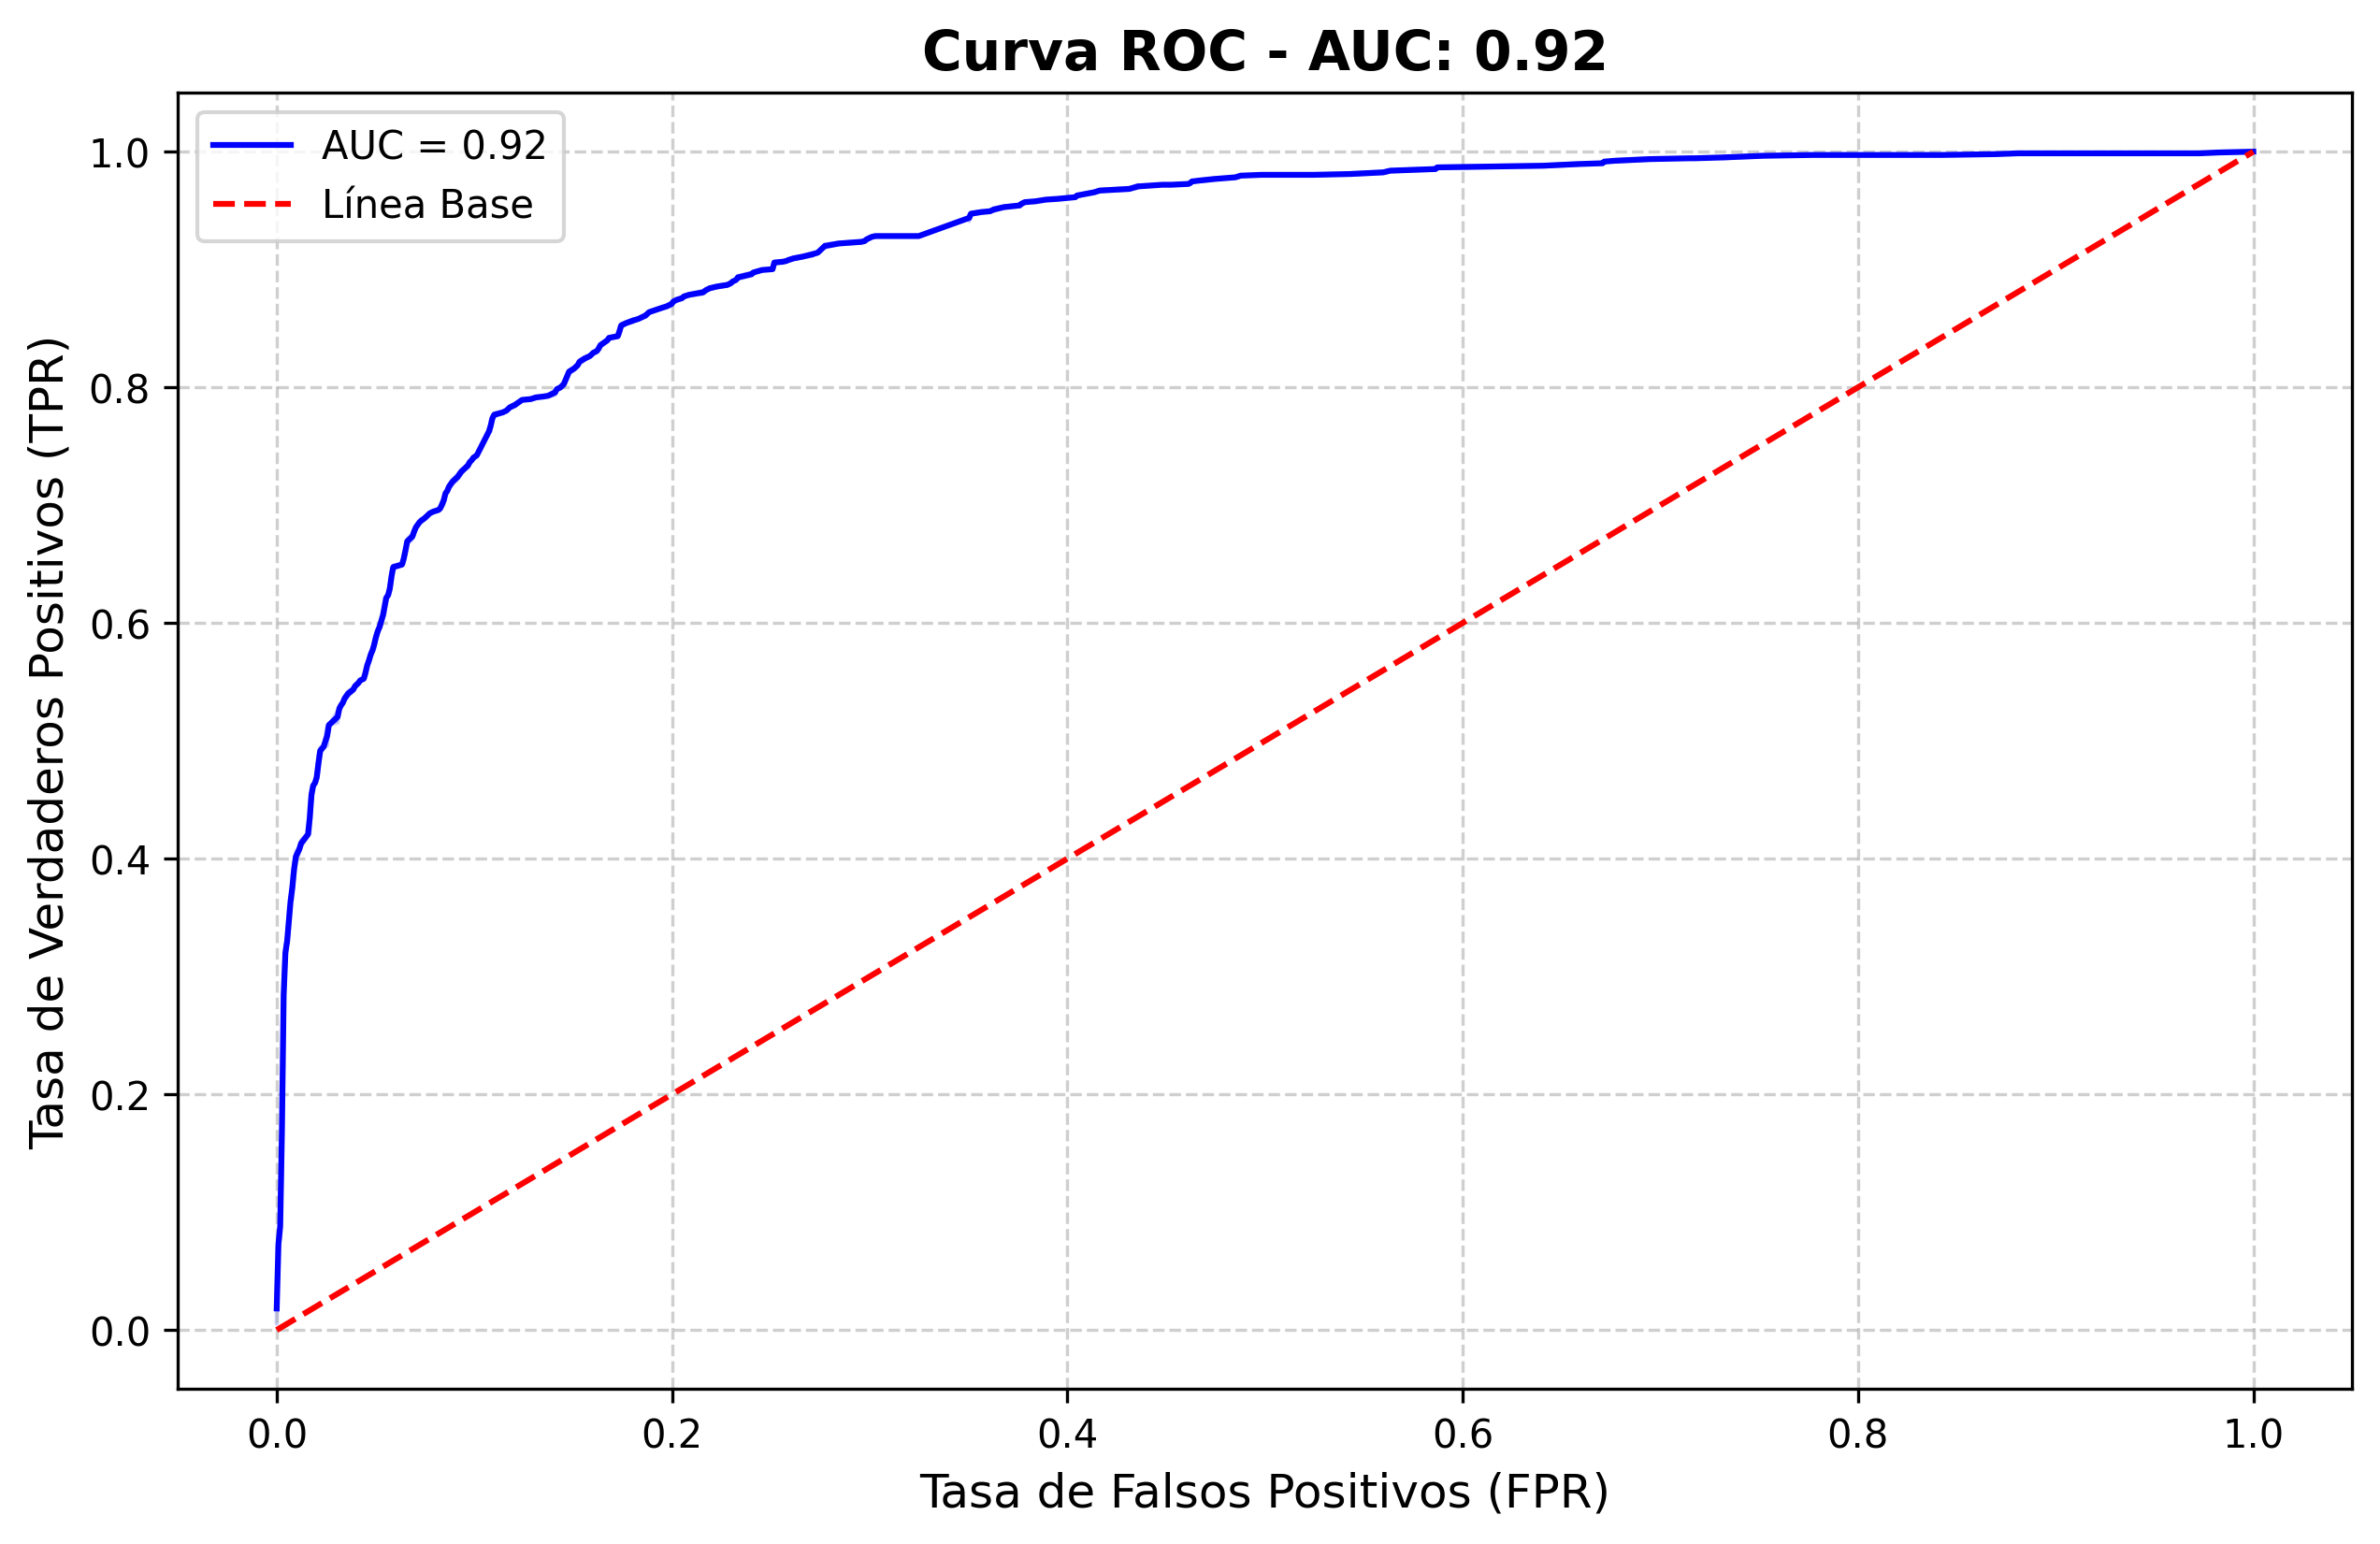

In [ ]:
# Mostramos el grafico de la Curva ROC
graficar_curva_roc(fpr, tpr, auc_calculado)

## **📊 Interpretación de la Curva ROC**


### **Forma de la Curva**
**La curva se muestra alejada de la línea diagonal roja**, lo que es una excelente señal, esa diagonal representa un modelo que adivina al azar, sin ninguna capacidad predictiva.

**Cuanto más se aleja de esa línea y se acerca a la esquina superior izquierda, mejor es el desempeño del modelo**.

### **AUC (Área Bajo la Curva)**
El AUC del Modelo es de aproximadamente 0.92, lo que **indica que tiene una gran capacidad para diferenciar correctamente entre leads que convierten y los que no**.

Esto significa que, en el 92% de los casos, el modelo es capaz de asignar una mayor probabilidad de conversión a un lead que efectivamente compra, comparado con uno que no lo hace.

### **Conclusión General**
**Un AUC de 0.92 refleja un modelo preciso, robusto y confiable**.

Además, al no ser un valor exageradamente alto, como 0.99 o 1, no parece haber síntomas de sobreajuste, **lo que demuestra que el modelo "aprendió" bien y no está "memorizando"**.

In [ ]:
#########################################################################################################################################################

# **Quinta Parte: Personalizacion del Umbral Óptimo en base a los Objetivos de cada Cliente**


## **Cálculo de la Utilidad Máxima con el Punto de Corte Óptimo**

**Este paso es esencial para personalizar el modelo según las necesidades del cliente**, maximizando la utilidad basada en sus Costos de invertir en un falso positivo y los Beneficios de que un cliente se convierta, optimizando el uso de los recursos del negocio.

### ¿Por qué es importante?
Al determinar el punto de corte óptimo, **podemos focalizar los recursos de manera más efectiva, destinándolos a los leads con mayor probabilidad de conversión en clientes**.

Este umbral ajustado permite priorizar **Verdaderos Positivos**, evitando desperdiciar tiempo y dinero en **Falsos Positivos**, ya que **solamente deja pasar los clientes que le convienen al negocio**.

### ¿Cómo lo haremos?
Utilizaremos una técnica que evalúa diferentes puntos de corte y personaliza el Modelo a cada cliente especifco.

Al obtener el Punto de Corte ajustado a sus **Costos de invertir en un Falso Positivo** y los **Beneficios de invertir en un Verdadero Positivo** y seleccionar el que le **ofrece la máxima utilidad, es decir, el umbral que optimiza la asignación de recursos**, conseguimos concentrar los esfuerzos en los leads más prometedores, lo que **permite que los recursos del negocio, como el tiempo y la inversión en marketing, sean dirigidos de manera más estratégica**.


###Función de Utilidad y Función de Costo
Este punto de corte se selecciona considerando tanto la función de utilidad como la función de costo:

- **Función de utilidad:** mide los beneficios de clasificar correctamente a un lead con alto potencial, maximizando las ganancias al centrarnos en los leads más valiosos.

- **Función de costo:** mide las pérdidas asociadas a la clasificación incorrecta de un lead, como asignar recursos a leads con baja probabilidad de conversión.

**Con esto nos aseguramos que el Umbral sea 100% personalizado y propio para cada cliente**.

### Importancia del Punto de Corte
El punto de corte adecuado es crucial para la eficiencia del modelo, un umbral incorrecto puede resultar en la asignación de recursos a leads que finalmente no se convierten en clientes, lo que genera un desperdicio de recursos e incluso de dinero.

En cambio, un punto de corte óptimo nos **permite canalizar los recursos de forma eficiente hacia los leads con mayor probabilidad de conversión**, lo que se traduce en una mayor rentabilidad y una mejor gestión del presupuesto, evitando desperdiciar dinero y recursos en aquellos que no terminan convirtiendo.

En resumen, esta técnica nos permite economizar recursos, enfocándonos en lo que realmente importa: **los leads con alta probabilidad de conversión**.

#### **Al aplicar este umbral optimizado, garantizamos que los esfuerzos del negocio se concentren en aquellos leads que realmente pueden generar valor, mejorando la eficiencia general del proceso maximizando la rentabilidad**.

In [ ]:
# Definimos los costos y beneficios (son datos de ejemplo que pueden ser ajustados con datos 100% reales y propios de cada cliente)
costo_FP = 50       # Costo de un falso positivo
beneficio_TP = 100  # Beneficio de un verdadero positivo

Y_real = Y_evaluacion.values # Convertimos en array los datos de evaluacion


# Inicializamos una lista para almacenar la utilidad en cada punto de corte y quedarnos con el mejor
utilidades = []

# Calcular la utilidad para cada punto de corte, haciendo unos de los Umbrales obtenidos con "roc_auc"
for umbral in puntos_de_corte:

    # Convertir las probabilidades en predicciones binarias (1 o 0)
    Y_pred_binario = (Y_prediccion >= umbral).astype(int)

    # Calcular Verdaderos Positivos (TP) y Falsos Positivos (FP)
    TP = np.sum((Y_pred_binario == 1) & (Y_real == 1))
    FP = np.sum((Y_pred_binario == 1) & (Y_real == 0))

    # Calcular la utilidad Maxima
    utilidad = (TP * beneficio_TP) - (FP * costo_FP)
    # Almacenar la utilidad en la lista
    utilidades.append(utilidad)

### Obtenemos el Punto de Corte Optimo y la Maxima Utilidad en base a los Costos y Beneficios especificos del cliente.

**Los Costos y los Beneficios son la clave para obtener un Umbral optimo personalizado que se ajuste a sus necesidades especificas**.

In [ ]:
# Obtenemos el Umbral óptimo y la máxima Utilidad
indice_max_utilidad = np.argmax(utilidades)
umbral_optimo = puntos_de_corte[indice_max_utilidad]
max_utilidad = utilidades[indice_max_utilidad]

# Mostramos el Umbral óptimo y la máxima Utilidad de este cliente
print(f"El punto de corte óptimo es: {umbral_optimo:.2f}")
print(f"La utilidad máxima obtenida es: ${max_utilidad:,.0f}")

El punto de corte óptimo es: 0.35
La utilidad máxima obtenida es: $50,900


### **Visualizamos la Funcion de Utilidad con el Punto de Corte Optimo obtenido**

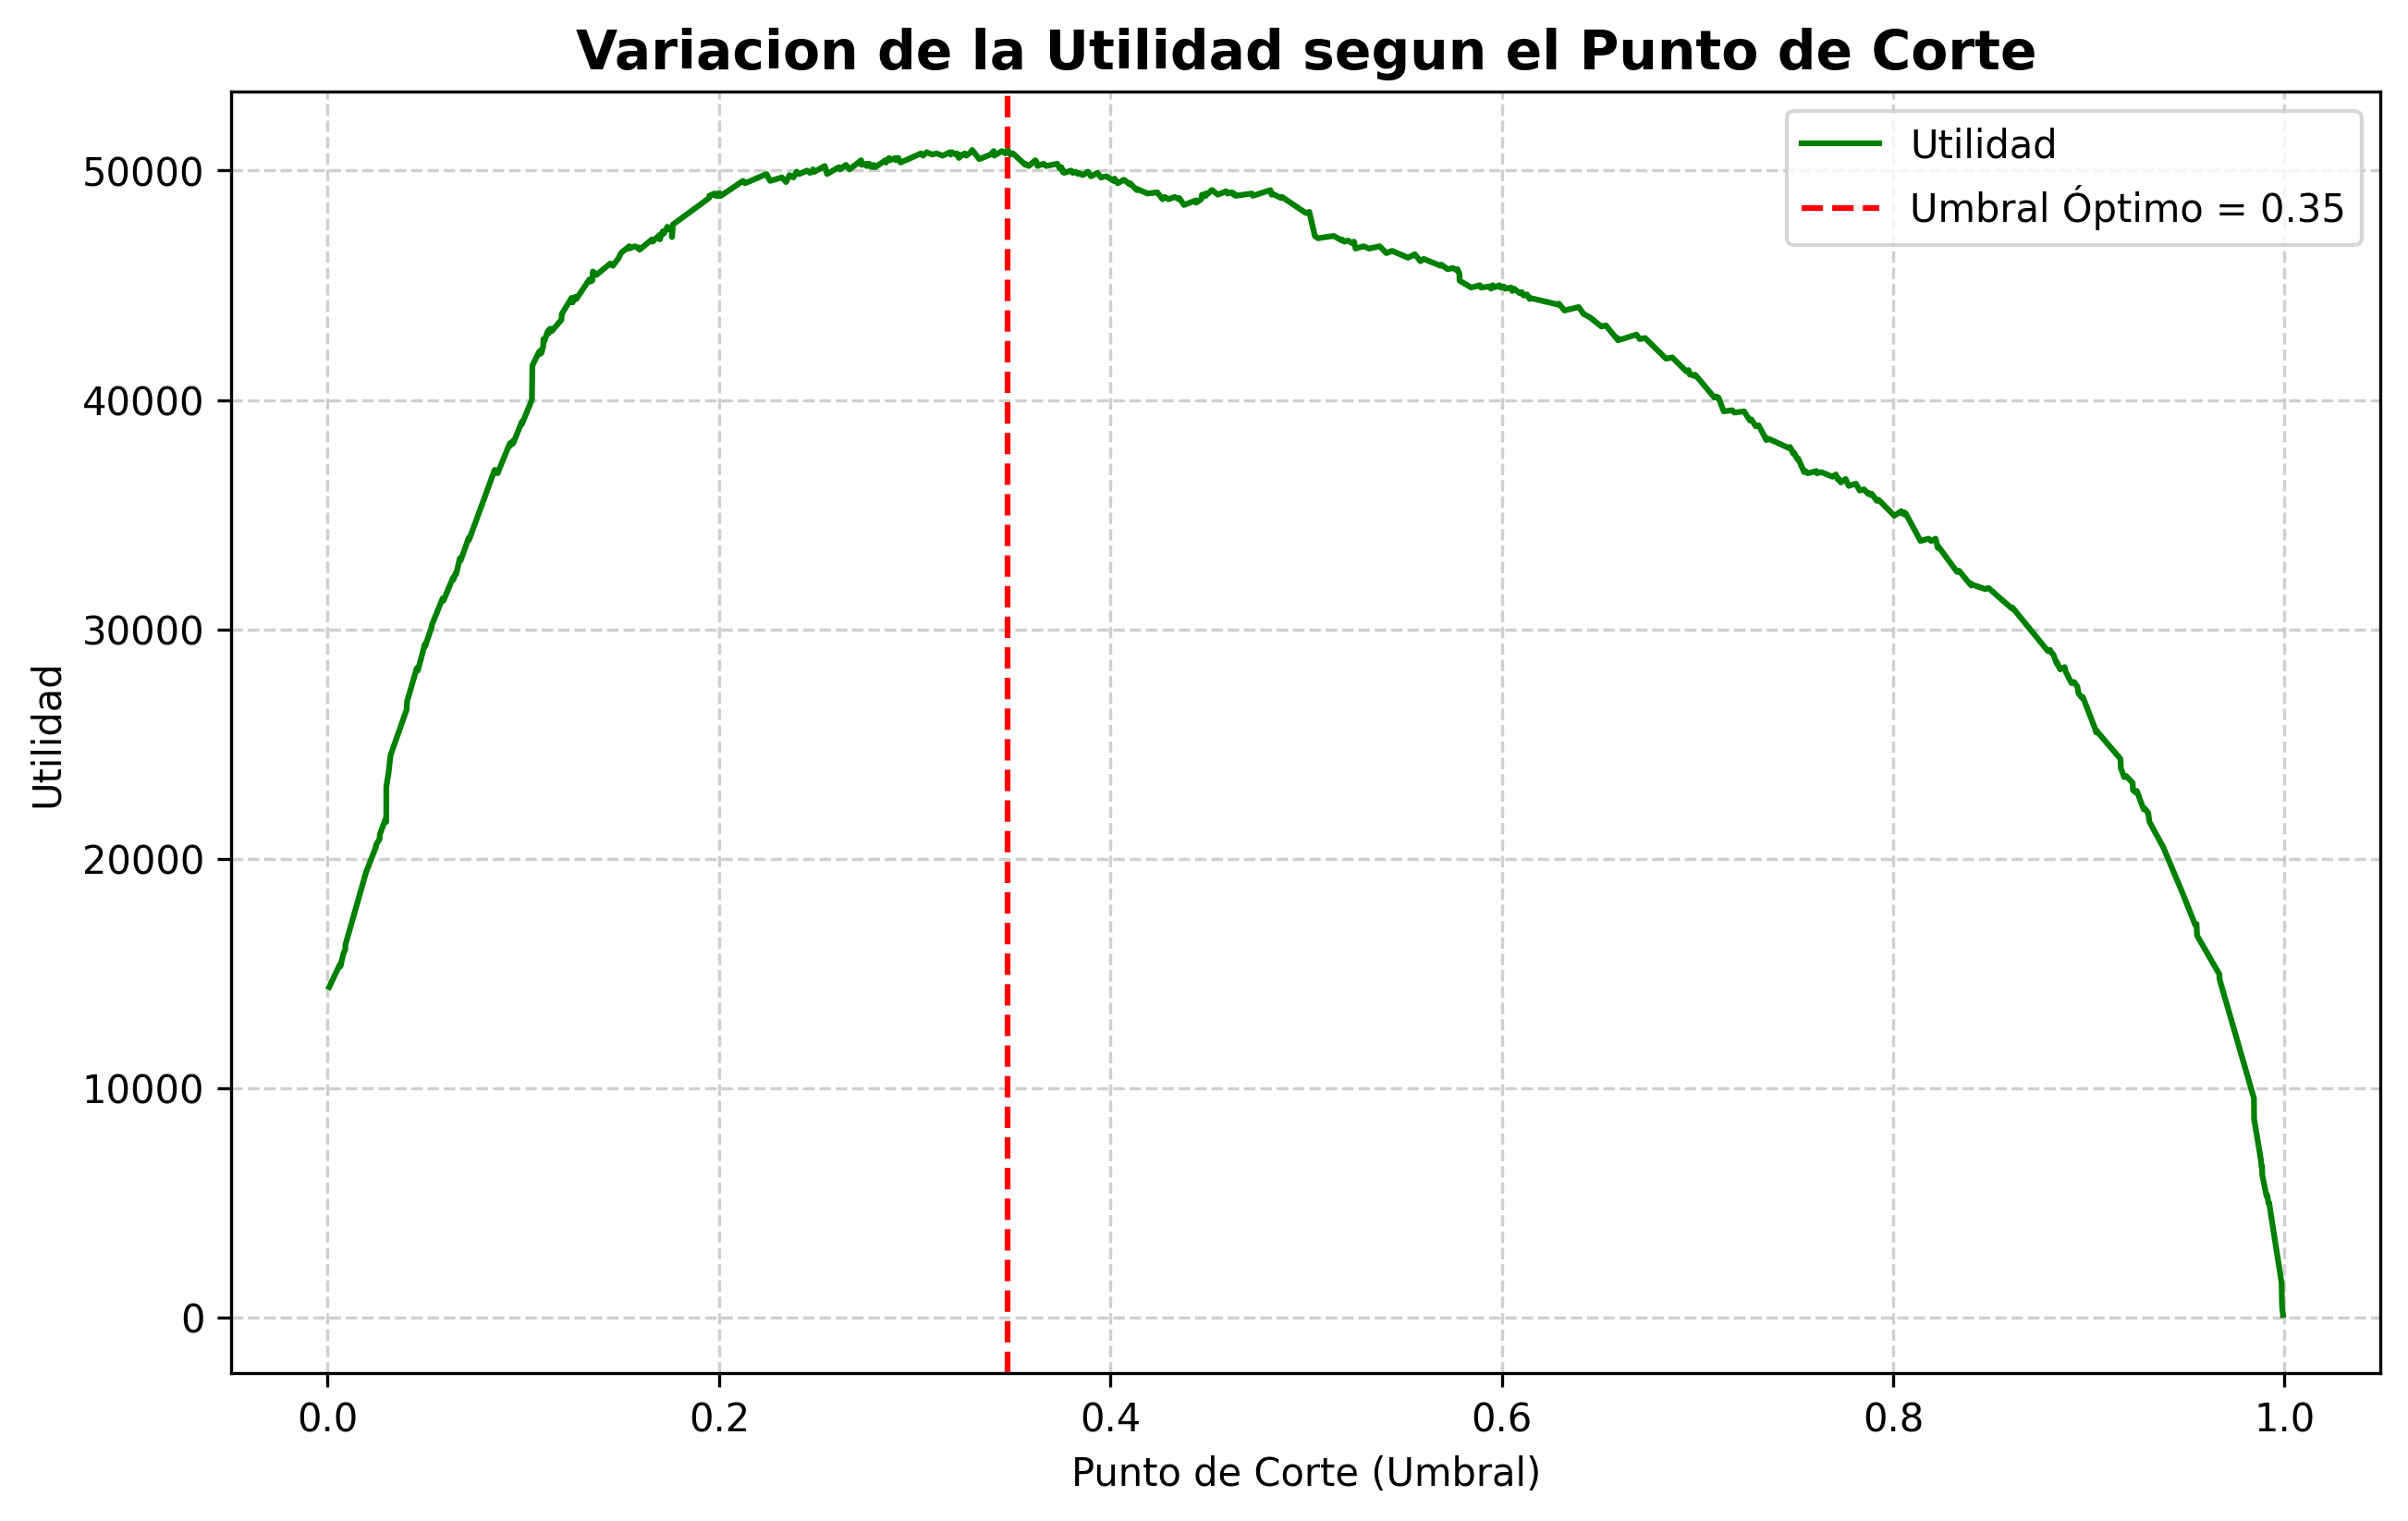

In [ ]:
# Creamos el grafico para visualizar la Utilidad en relacion al Punto de Corte
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(puntos_de_corte, utilidades, label='Utilidad', color='green')
plt.axvline(x=umbral_optimo, color='red', linestyle='--', label=f'Umbral Óptimo = {umbral_optimo:.2f}')
plt.title('Variacion de la Utilidad segun el Punto de Corte', fontsize=14, fontweight='bold')
plt.xlabel('Punto de Corte (Umbral)')
plt.ylabel('Utilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)



# Mostrar el gráfico
plt.show()

### **Interpretación del Gráfico de Utilidad y Umbral Óptimo**
El gráfico se ve excelente, se observa claramente cómo la utilidad aumenta hasta un punto máximo cerca del umbral de 0.33 y luego comienza a disminuir.

La curva tiene una forma típica en problemas de clasificación con optimización de utilidad, esto confirma que ese umbral es el óptimo según la métrica de utilidad.

#### Conclusión Ejecutiva:

El análisis del gráfico confirma que **la elección del umbral no debe basarse en métricas tradicionales como precisión o F1-score, sino en una métrica alineada con los objetivos económicos reales del negocio, como esta personalizacion**.

Este enfoque orientado a utilidad demuestra que el modelo predictivo no solo identifica quién puede convertirse en cliente, sino que **también guía a la empresa sobre en quién realmente vale la pena invertir recursos**, generando un impacto tangible en la rentabilidad general.

###  **Aplicamos el Umbral Óptimo al Modelo**
Convertimos las predicciones de probabilidades a valores Binarios.

In [ ]:
# Predicción final con umbral óptimo, convertidas a valores Binarios
Y_pred_final = (Y_prediccion >= umbral_optimo).astype(int)

# 🧠 **Sexta Parte: Comprendiendo cómo el modelo toma decisiones personalizadas con el Umbral optimizado**

Una vez ajustado el punto de corte (umbral) según los costos y beneficios de un cliente específico, ya no nos interesa evaluar el rendimiento tradicional del modelo, **sino entender cómo está tomando decisiones basadas en lo que realmente le convienen al cliente**.

Para esto, usamos dos herramientas clave que nos permiten analizar su comportamiento real:

### **📋 Reporte de Clasificación**

Este reporte nos muestra cómo el modelo distribuye sus predicciones con el nuevo umbral ajustado:

- **Revela qué decisiones prioriza el modelo en función del valor que cada predicción tiene para el cliente**.

- **Nos permite ver los riesgos controlados que está tomando el Modelo** para captar compradores reales, en funcion a lo que más le conviene al cliente.

- **Ayuda a entender como el modelo está alineado con los objetivos comerciales definidos**, como aumentar conversiones sin generar muchos falsos positivos.

 En resumen: **el reporte de clasificación refleja si el modelo está tomando decisiones estratégicas adaptadas a lo que el cliente necesita y valora**.

###**🔲 Matriz de Confusión**

Esta herramienta desglosa cuántas veces el modelo acertó o se equivocó, y en qué tipo de casos:

- **Muestra cómo el modelo gestiona los errores que el cliente está dispuesto a aceptar**, a cambio de un mayor beneficio potencial, siempre basado en sus necesidades.

- Permite ver si el modelo está priorizando acertar en los leads más valiosos, **incluso si eso implica cometer algunos errores en los menos importantes**.

- **Ayuda a comprobar que el modelo está operando bajo las condiciones personalizadas del cliente**, no de forma genérica.

En pocas palabras: **la matriz de confusión nos permite ver qué tipo de decisiones está tomando el modelo, por qué las toma y cómo se alinean con la estrategia del cliente**.

### ✅ Conclusión:

Estas herramientas no solo nos ayudan a entender qué tan bien predice el modelo, **sino cómo y por qué toma decisiones personalizadas que generan mayor valor para el cliente**.

Gracias al umbral optimizado, **el modelo no se comporta de forma genérica, sino que actúa estratégicamente**, maximizando los beneficios reales según el contexto de negocio del cliente.

In [ ]:
# Importamos las metricas desde sklearn
from sklearn.metrics import classification_report, confusion_matrix

# Obtenemos el Reporte de Clasificación
print("\n🔎 Reporte de Clasificación:")

print(classification_report(Y_real, Y_pred_final))

# Obtenemos la Matriz de Confusion
print("\n📊 Matriz de Confusión:")

print(confusion_matrix(Y_real, Y_pred_final))



🔎 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1136
           1       0.75      0.85      0.80       712

    accuracy                           0.84      1848
   macro avg       0.83      0.84      0.83      1848
weighted avg       0.84      0.84      0.84      1848


📊 Matriz de Confusión:
[[938 198]
 [104 608]]


##🤖 **¿Qué decisiones está tomando el modelo según los resultados obtenidos?**
Luego de aplicar el punto de corte optimizado, el modelo no toma decisiones al azar, sino que ha logrado interpretar lo que realmente el cliente necesita:

**captar la mayor cantidad posible de compradores reales, aunque eso implique aceptar algunos falsos positivos**.

Veamos cómo los resultados lo confirman:

###**📊 Matriz de Confusión**

#### ✅ 608 Verdaderos Positivos:
El modelo decide apostar por estos leads como compradores, y acierta.

Este grupo representa la parte más valiosa del negocio, y **gracias al umbral ajustado, se logra captar una gran proporción de clientes rentables para el negocio**.

####⚠️ 198 Falsos Positivos:
Aquí, el modelo clasificó como compradores a leads que no lo eran.

Sin embargo, **es un riesgo que al cliente le conviene asumir si a cambio logra captar más compradores reales**.

Es una decisión basada en la estrategia: **"Mejor contactar un poco de más que perder muchas ventas."**

####🔍 104 Falsos Negativos:

El modelo dejó pasar algunos compradores reales, pero son pocos.

Esto significa que **el modelo está siendo lo suficientemente flexible para priorizar la captura de leads valiosos, sin excederse en errores**.

####🛑 938 Verdaderos Negativos:

Aquí el modelo acierta al descartar leads que no iban a convertir, **ahorrando muchos recursos y dinero al no contactar a 938 Leads que al final no iban a terminar convirtiendose en clientes**.

###**📋 Reporte de Clasificación**

#### 85% de sensibilidad en compradores:

**El modelo decide apostar por más leads que podrían ser compradores, lo que cumple con el enfoque de maximizar conversiones**.

#### Precisión controlada del 75% en compradores:

El modelo acepta que algunos leads clasificados como compradores no lo serán.

Esta decisión es recomendaba para el cliente, ya que **es parte del equilibrio entre riesgo y beneficio**.

###✅ Conclusión

En resumen, **el modelo está tomando decisiones con propósito**:

- Detectar más compradores reales aumentando la rentabilidad economica.

- Aceptar algunos pocos errores, pero **eso significa aumentar las ventas valiosas en mucha mayor proporcion que los errores asumidos**.

- Reducir el desperdicio, pero sin sacrificar algunas oportunidades.



####Gracias al punto de corte personalizado, el modelo se comporta como un verdadero asistente de decisiones para el negocio, priorizando lo que realmente importa: **acciones alineadas con los objetivos reales del cliente**.



In [ ]:
##########################################################################################################################################################

# **Séptima Parte: Comparacion de la Utilidad antes y despues del Modelo**

En esta fase, **compararemos la utilidad general obtenida sin el uso del modelo predictivo con la utilidad final generada después de aplicar el modelo con el umbral optimizado**, teniendo en cuenta que **la utilidad no se mide solo en cantidad de leads, sino en el valor real que aportan al negocio una vez convertidos en clientes**.

El objetivo es evaluar el impacto del modelo en términos de rentabilidad, observando cómo **su implementación impacta la eficiencia de las conversiones de leads y la rentabilidad total del negocio**, a través de esta comparación, analizaremos cómo el modelo contribuye a una asignación más inteligente de recursos y su efecto en la mejora de la rentabilidad por cliente convertido.

In [ ]:
# Calcular utilidad general sin usar el Umbral, todos los leads contactados, sin ninguna estrategia inteligente
utilidad_general = df["Converted"].sum() * beneficio_TP - (len(df) - df["Converted"].sum()) * costo_FP


# Mostramos el Resultado de la Utilidad antes y despues de aplicar el Umbral, para compararlas
print(f"\n💰 Utilidad General sin Umbral optimizado : ${utilidad_general:,.0f}")
print(f"\n💰 Utilidad final del modelo con Umbral optimizado de 0.35: ${max_utilidad:,.0f}")


💰 Utilidad General sin Umbral optimizado : $72,150

💰 Utilidad final del modelo con Umbral optimizado de 0.35: $50,900


## **📊 Interpretación de los Resultados de la Utilidad**

###¿Cómo Impacta el Modelo Predictivo en las Decisiones de Negocio?
En esta fase analizamos y comparamos dos escenarios:

**La utilidad obtenida sin aplicar ningún modelo de predicción.**

**La utilidad después de aplicar el modelo con un umbral optimizado**, diseñado específicamente para las necesidades del cliente.

El objetivo no es únicamente comparar cifras absolutas de utilidad, sino comprender cómo **el modelo mejora la eficiencia y la rentabilidad estratégica del negocio**.

#### **Utilidad sin aplicar el modelo: $72,150**
Esta utilidad representa los ingresos obtenidos al tratar de convertir todos los leads por igual, sin aplicar ningún tipo de filtro o criterio de priorización, es decir, no existe una estrategia clara para decidir en cuáles leads vale la pena invertir recursos.

Como resultado, aunque se convierten algunos clientes, también se incurre en altos costos operativos y de marketing al invertir tiempo y dinero en falsos positivos: **leads que parecen prometedores, pero que finalmente no se convierten en clientes**.

Este escenario puede ser engañoso, ya que las ganancias aparentes ocultan una gran ineficiencia en la asignación de recursos, lo que en el mediano y largo plazo puede afectar la rentabilidad real del negocio.

#### **Utilidad con el modelo aplicado y umbral optimizado: $50,900**
En este caso, el modelo utiliza un punto de corte personalizado, ajustado a los costos y beneficios reales del negocio.

Este umbral actúa como un filtro inteligente que **permite enfocarse en los leads con mayor probabilidad de conversión y mayor valor económico**.

Aunque la utilidad total en este escenario es menor en comparación con el caso sin modelo, los recursos están mejor distribuidos: **en su mayoría se invierten en verdaderos positivos, es decir, leads que efectivamente se convierten en clientes de valor**.

En otras palabras, **la empresa evita desperdiciar recursos en leads que parecen prometedores pero no lo son**, y concentra sus esfuerzos en quienes tienen más probabilidades de generar gran retorno economico y ayuda en la fase de fidelizacion.

####**¿Por qué el modelo es beneficioso, incluso con una utilidad menor?**
Una utilidad más baja no significa una estrategia menos rentable, el modelo no busca convertir más leads, sino convertir mejor.

Esto se traduce en:

- Menor desperdicio de recursos.

- Mayor retorno economico por Lead convertido.

- Mayor control sobre las decisiones comerciales.

- Optimización de campañas de marketing enfocadas en clientes que sí aportan valor real.

**Esta estrategia es especialmente útil para empresas que desean crecer de manera sostenible, invirtiendo con inteligencia y aumentando su retorno de inversión (ROI) a largo plazo.**

###✅ Conclusión: Un Modelo Enfocado en Valor, no en Volumen
**El modelo predictivo con umbral optimizado aporta valor estratégico real al negocio, al filtrar los leads y concentrar recursos donde verdaderamente importan.**

Esto permite:

- Ahorrar dinero.

- Maximizar la eficiencia.

- Aumentar la rentabilidad por cliente.

- Tomar decisiones mas inteligentes basadas en datos y no suposiciones.

Aunque en apariencia se obtiene menos utilidad total, el modelo mejora radicalmente la calidad de cada conversión, lo que significa que **cada cliente ganado genera un impacto más fuerte en las ganancias del negocio**.

####En definitiva, los resultados del modelo son altamente positivos, pues representan una estrategia inteligente, personalizada y rentable, que pone al negocio en el camino hacia un crecimiento más eficiente y sostenible.

In [ ]:
##########################################################################################################################################################

# **Octava Parte: Comparacion de las Tasas de Conversion antes y despues de aplicar el Modelo**

Comparar la tasa de conversión original con la obtenida tras aplicar el modelo, nos ayuda a evaluar de forma clara **cómo la herramienta mejora la eficiencia del proceso de Conversion**.

Este análisis demuestra el valor real que aporta el modelo, mostrando que no solo predice, sino que ayuda a enfocar los esfuerzos en los leads con más potencial, **aumentando así la tasa de conversión y optimizando el uso de los recursos del negocio**.

Al obtener claridad de cuales son los Leads con mas potencial de conversion, es mas facil concluir con el proceso de convertirlo en cliente.

In [ ]:
# Calcular la tasa de conversión general sin aplicar el modelo
tasa_conversion = round(df['Converted'].mean(), 2)
print(f"\n🎯 Tasa de conversión general: {tasa_conversion * 100}%")

# Obtenemos la tasa de conversion del Modelo con el Umbral optimo asignado
tasa_conversion = np.mean(Y_pred_final)
print(f"\n🎯 Tasa de Conversion del Modelo con corte {umbral_optimo:.2f}: {tasa_conversion * 100:.2f}%")




🎯 Tasa de conversión general: 39.0%

🎯 Tasa de Conversion del Modelo con corte 0.35: 43.61%


## **Evaluación del Impacto del Modelo en la Conversión de Leads**
Uno de los objetivos clave de utilizar un Modelo de prediccion es mejorar la tasa de conversión de Leads a clientes.

Para ello, primero identificamos la tasa de conversión general, que representa el porcentaje de leads que se convierten en clientes sin ningún tipo de filtrado inteligente, **esta tasa fue del 39.0%, reflejando el rendimiento natural del proceso de conversion**.

Luego, aplicamos nuestro modelo predictivo ajustado con un umbral de decisión optimizado de 0.35, perzonalizado en los Costos y Beneficios especificos, enfocado en maximizar el valor económico.

Con esta configuración, **la nueva tasa de conversión alcanzó un 43.61%, lo que representa una mejora clara y cuantificable en la eficiencia del proceso de Conversion**, este resultado demuestra el valor que aporta el modelo:

**Permite priorizar los leads con mayor probabilidad de conversión**, enfocando los esfuerzos comerciales y de marketing en los segmentos más prometedores.

De esta forma, no solo se incrementa la tasa de conversión, sino que se **optimiza el uso de recursos, aumentando el retorno sobre la inversión**.


### Conclusion:
**En resumen, el modelo no solo predice quiénes tienen más probabilidades de convertirse en clientes, sino que transforma esa predicción en acciones concretas que mejoran el desempeño comercial.**



In [ ]:
##########################################################################################################################################################

# **Novena Parte: Optimización de la Rentabilidad mediante Segmentación de Variables Relevantes**

### **Etapa de Segmentación y su Aporte al Negocio**


En esta etapa, **el objetivo es analizar cómo se distribuye la rentabilidad generada por los leads a través de diferentes variables relevantes** que impactan el comportamiento de conversión.

**Utilizaremos el Umbral Optimo que obtuvimos con el Modelo**, lo que nos permitirá calcular la utilidad económica generada por cada segmento dentro de cada Variable, **este análisis detallado nos da una visión más clara de qué factores o segmentos contribuyen más a la rentabilidad total**.

####**Proceso de Segmentación:**

Realizaremos una segmentación de los datos en función de variables clave que influyen en la conversión de los leads, como pueden ser fuentes de tráfico, características del cliente o el comportamiento durante el proceso de ventas, cada segmento representa un factor que afecta directamente el valor generado por cada Lead.

####**Cálculo de Utilidad por Segmento:**

A partir de las predicciones del modelo, calculamos la utilidad económica de cada segmento.

Esto nos permite identificar cuáles son los segmentos que más aportan a la rentabilidad y qué áreas podrían necesitar optimización.

####**Valor del Analisis de segmentacion en un Negocio:**
Este analisis tiene un gran valor para el negocio, ya que proporciona una base para tomar decisiones informadas, permite identificar:

- **Segmentos de alto rendimiento:** Dónde invertir más recursos, como en canales de marketing más rentables.

- **Optimización de campañas:** Redirigir esfuerzos de marketing hacia los segmentos con mayor retorno económico.

- **Priorización de ventas:** Atender de manera más eficaz a los leads con mayor probabilidad de generar ganancias.

#### **Impacto en la Toma de Decisiones Estratégicas**

Este enfoque permite no solo evaluar el volumen de leads, sino también su capacidad real de generar beneficios, las decisiones comerciales y de marketing se basan en datos precisos, lo que asegura que los recursos se inviertan de manera más eficiente y estratégica.

###Conclusión:

La segmentación de la rentabilidad proporcionada por diferentes variables **permite una toma de decisiones más precisa y alineada con los objetivos de rentabilidad del negocio**.

####Este enfoque optimiza las inversiones y mejora la eficiencia de las campañas, lo que **se traduce en un aumento de la rentabilidad**, una mejor capacidad de adaptación a cambios del mercado y una **gran disminucion de perdidas economicas** al invertir de manera correcta, basandonos en decisiones bien infomadas.



In [ ]:
# Obtenemos las predicciones
Y_prediccion = modelo_reg_logistica.predict_proba(X)[:, 1]  # Probabilidades de la clase positiva (1)

# Obtenemos las predicciones en formato binario basado en el Umbral Optimizado
predicciones_con_umbral = (Y_prediccion >= umbral_optimo).astype(int)


In [ ]:
# Creamos la columna con las predicciones
df['prediccion'] = predicciones_con_umbral

In [ ]:
# Añadimos las predicciones al Dataframe Original
df['utilidad'] = df['prediccion'] * beneficio_TP

### Creamos una funcion que nos permite analizar la Variable especifica que deseemos de Manera "automatica".

In [ ]:
# Creamos la funcion
def calcular_utilidad_por_categoria(df, columna_categoria, columna_prediccion='prediccion'):
    # Filtrar solo los registros que han sido clasificados como convertidos según la predicción
    df_convertidos = df[df[columna_prediccion] == 1]

    # Agrupar por la columna categoría y calcular la suma de la utilidad
    utilidad_por_categoria = df_convertidos.groupby(columna_categoria)['utilidad'].sum().reset_index()

    # Ordenar por utilidad de mayor a menor
    utilidad_por_categoria = utilidad_por_categoria.sort_values(by='utilidad', ascending=False)

    # Calcular la utilidad total de los registros convertidos
    utilidad_total = df_convertidos['utilidad'].sum()

    # Calcular el porcentaje de utilidad de cada categoría
    utilidad_por_categoria['porcentaje_utilidad'] = (utilidad_por_categoria['utilidad'] / utilidad_total) * 100

    # Mostrar el resultado
    return utilidad_por_categoria


### Analizamos la Variable "Lead Source" para ver un ejemplo

**Para analizar otra variable solo cambiamos "Lead Source", por el nombre de la variable especifica que queremos analizar**

In [ ]:
# Llamamos a la función con el DataFrame original y la columna que deseamos analizar en este caso "Lead Source"
resultado = calcular_utilidad_por_categoria(df, "Lead Source")

# Mostrar los resultados
print(resultado)


          Lead Source  utilidad  porcentaje_utilidad
6              Google    287300            31.093074
4      Direct Traffic    254300            27.521645
9          Olark Chat    175500            18.993506
10     Organic Search    115400            12.489177
13          Reference     53400             5.779221
19   Welingak Website     14200             1.536797
14     Referral Sites     12500             1.352814
5            Facebook      5500             0.595238
3         Desconocido      3600             0.389610
0                Bing       600             0.064935
2          Click2Call       400             0.043290
7           Live Chat       200             0.021645
12      Press_Release       200             0.021645
15       Social Media       200             0.021645
1                Blog       100             0.010823
11  Pay Per Click Ads       100             0.010823
8              Nc_Edm       100             0.010823
16            Testone       100             0.

<ipython-input-71-7e2bf99f838c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  utilidad_por_categoria = df_convertidos.groupby(columna_categoria)['utilidad'].sum().reset_index()


##**📈Análisis de Segmentación por Fuente de Lead**

###¿Qué canales aportan más a la utilidad del negocio?

Este análisis se enfoca en evaluar cómo se comportan las diferentes fuentes de leads (Lead Source) en términos de utilidad generada.

El objetivo es claro: **identificar qué segmentos impulsan la rentabilidad y cuáles no aportan valor, para así enfocar esfuerzos estratégicos en los canales correctos**.

###🥇 Segmentos más rentables
- **Google** con 31% y **Direct Traffic** con 27% son las fuentes más rentables, **aportando en conjunto cerca del 60% de la utilidad total**.

- Le siguen **Olark Chat** y **Organic Search**, con un peso combinado de más del 30%.

#### Interpretación:
Estas fuentes no solo generan leads, sino que generan leads de calidad, con alta probabilidad de conversión y buena rentabilidad.

**Estas son las vías estratégicas que deben priorizarse en campañas, presupuestos de marketing y seguimiento personalizado**.

###🚫 Segmentos poco rentables

- Canales como **Blog**, **Pay Per Click Ads**, **Nc_Edm**, **Youtubechannel**, entre otros, aportan menos del 0.05% de la utilidad cada uno.

- En total, **hay más de 10 canales con impacto prácticamente nulo en los resultados del negocio**.

####Interpretación:
Aunque estos canales pueden atraer tráfico, **no generan valor económico significativo**.

**Esto abre la puerta a reducir inversión, optimizar campañas o replantear la estrategia en estos canales**.

###✅ Conclusión: Decisiones que mejoran la rentabilidad

Gracias a este análisis de segmentación, el cliente puede ahora:

- Enfocar esfuerzos en las fuentes más rentables, **aumentando el retorno sobre la inversión (ROI)**.

- **Optimizar recursos**, reduciendo o reestructurando los canales que no aportan valor.

- **Tomar decisiones basadas en evidencia real**, y no solo en la cantidad de leads generados.

###**Este tipo de enfoque no solo mejora el desempeño de los equipos de marketing y ventas, sino que aumenta directamente la rentabilidad del negocio, maximizando el valor por cada lead captado**.

# **✅ Conclusión Final del Modelo Predictivo**
Este modelo fue desarrollado con un enfoque completamente personalizado, adaptado a los objetivos, prioridades y estructura de costos y beneficios del cliente.

Más allá de un buen rendimiento técnico, **se diseñó como una herramienta estratégica, que permite tomar decisiones comerciales más inteligentes, alineadas con lo que realmente genera valor para el negocio**.

###🎯 **¿Qué hicimos?**
- Construimos un modelo de clasificación con ajuste del **Umbral de decisión perzonalizado, calculado específicamente según los costos de errores y los beneficios reales del cliente** al captar un lead.

- Este umbral personalizado nos **permite que el modelo tome decisiones que favorecen al negocio, priorizando las predicciones que maximizan la rentabilidad**.

- Evaluamos el comportamiento del modelo mediante herramientas como la curva ROC, matriz de confusión y el reporte de clasificación, no para medir precisión técnica, sino **para comprender cómo decide en función del escenario real del cliente**.

- Aplicamos segmentación para descubrir fuentes de leads más rentables como ejemplo, **para ver como facilita la toma de decisiones estratégicas de inversión en marketing**.

- Desde el inicio, aplicamos un proceso automatizado y optimizado de tratamiento de variables, **usando código eficiente que permitió transformar, seleccionar y preparar los datos de forma rápida y precisa**, esto garantizó una base sólida para el modelo sin perder tiempo en tareas manuales.

###**🚀 Potencial e Impacto**
Este modelo **representa el poder de la Inteligencia Artificial** aplicada a problemas de negocio reales, con una solución que:

🔹 **Alinea sus decisiones con los objetivos económicos del cliente**, evitando criterios genéricos.

🔹 Permite priorizar leads según el valor que realmente aportan, en lugar de basarse en probabilidades abstractas.

🔹 **Mejora la eficiencia operativa**, reduce gastos innecesarios y aumenta directamente los ingresos.

🔹 **Puede aplicarse en sectores como educación, ventas, tecnología, bienes raíces, y más**.

🔹 Está construido sobre un flujo de trabajo eficiente y automatizado, **escalable para futuros proyectos similares**.

###💡 **¿Cómo aporta valor?**
Este modelo no es una solución estándar, es una herramienta inteligente, práctica y alineada con el negocio, que **optimiza las decisiones basadas en la realidad económica del cliente**.

###**Demuestra cómo una estrategia de Machine Learning centrada en el negocio, respaldada por procesamiento eficiente y decisiones personalizadas, puede marcar la diferencia entre simplemente predecir y realmente impactar en la rentabilidad de una empresa**.

